# Import

In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(),".."))

import copy
import torch
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV

In [2]:
data_dir = "final"
csv_file = os.path.join(os.getcwd(),"..","data", data_dir, "240909_grace_dataset.csv")
df = pd.read_csv(csv_file)
print('Total:',len(df))
df.head()

Total: 209731


,x_c_l,y_c_l,z_c_l,x_c_r,y_c_r,z_c_r,cmd_theta_lower_neck_pan,cmd_theta_lower_neck_tilt,cmd_theta_upper_neck_tilt,cmd_theta_left_eye_pan,cmd_theta_right_eye_pan,cmd_theta_eyes_tilt,state_theta_lower_neck_pan,state_theta_left_lower_neck_tilt,state_theta_right_lower_neck_tilt,state_theta_left_upper_neck_tilt,state_theta_right_upper_neck_tilt,state_theta_left_eye_pan,state_theta_right_eye_pan,state_theta_eyes_tilt
0,-0.873669,-0.334702,0.738088,-1.166921,-0.352033,0.738508,-35,-10,-10,-14,-14,20,-34.365234,-9.228516,9.404297,-10.107422,9.84375,-14.150391,-14.150391,19.951172
1,-0.821681,-0.331576,0.738000,-0.997318,-0.340332,0.738221,-35,-10,-10,-12,-12,20,-34.365234,-9.228516,9.404297,-10.107422,9.84375,-12.216797,-12.128906,19.951172
2,-0.731501,-0.324165,0.738176,-0.868484,-0.332085,0.738360,-35,-10,-10,-10,-10,20,-34.365234,-9.228516,9.404297,-10.107422,9.84375,-9.931641,-9.931641,19.951172
3,-0.672994,-0.320809,0.737795,-0.776648,-0.327031,0.737932,-35,-10,-10,-8,-8,20,-34.365234,-9.228516,9.404297,-10.107422,9.84375,-8.261719,-8.085938,19.951172
4,-0.613507,-0.317492,0.737656,-0.690487,-0.321762,0.737752,-35,-10,-10,-6,-6,20,-34.365234,-9.228516,9.404297,-10.107422,9.84375,-6.416016,-6.064453,19.951172


# Plot Eye Pan, Zero Others

In [3]:
zero_df = df[(df['cmd_theta_lower_neck_pan']==0)
             & (df['cmd_theta_lower_neck_tilt']==0)
             & (df['cmd_theta_upper_neck_tilt']==0)
             & (df['cmd_theta_eyes_tilt']==0)]
print(len(zero_df))

45


## 0.75 meter

In [4]:
zero_df_075m = zero_df[(zero_df['z_c_l'] >= 0.65) & (zero_df['z_c_l'] <=0.85)]
print(len(zero_df_075m))

15


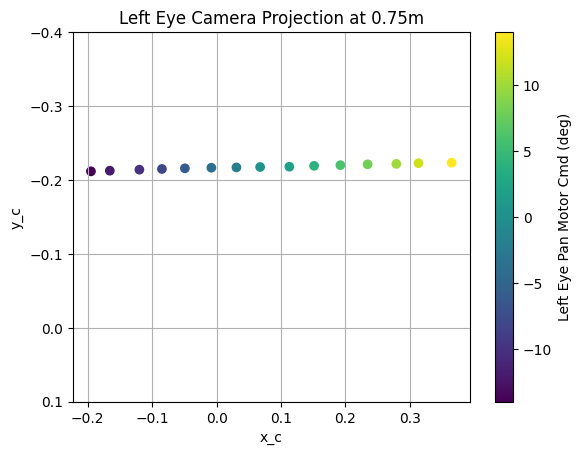

In [5]:
# Left Eye Cam
plt.figure()
data_for_colors = df['cmd_theta_left_eye_pan'].unique()
plt.scatter(zero_df_075m['x_c_l'],zero_df_075m['y_c_l'], c=data_for_colors, cmap='viridis')
plt.colorbar(label='Left Eye Pan Motor Cmd (deg)')
plt.ylim([0.1,-0.4])
plt.xlabel('x_c')
plt.ylabel('y_c')
plt.title('Left Eye Camera Projection at 0.75m')
plt.grid()

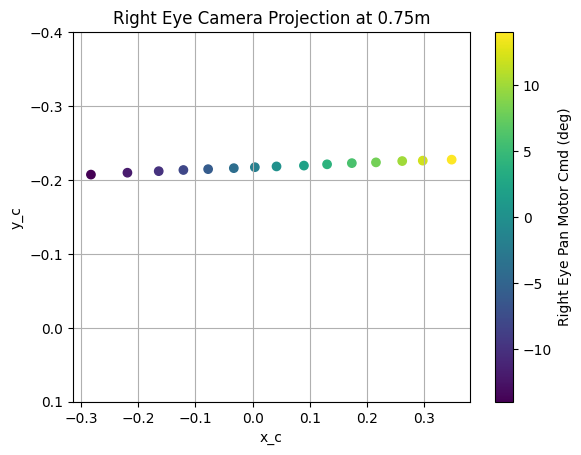

In [6]:
# Right Eye Cam
plt.figure()
data_for_colors = df['cmd_theta_right_eye_pan'].unique()
plt.scatter(zero_df_075m['x_c_r'],zero_df_075m['y_c_r'], c=data_for_colors, cmap='viridis')
plt.colorbar(label='Right Eye Pan Motor Cmd (deg)')
plt.ylim([0.1,-0.4])
plt.xlabel('x_c')
plt.ylabel('y_c')
plt.title('Right Eye Camera Projection at 0.75m')
plt.grid()

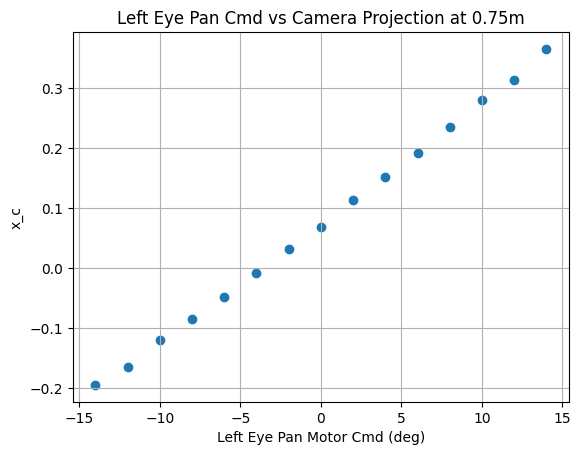

In [7]:
# Left Eye Pan Cmd vs Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_left_eye_pan'],zero_df_075m['x_c_l'])
plt.xlabel('Left Eye Pan Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Left Eye Pan Cmd vs Camera Projection at 0.75m')
plt.grid()

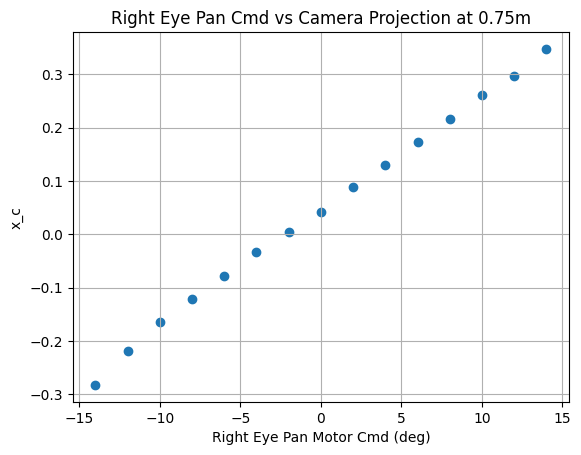

In [8]:
# Right Eye Pan Cmd vs Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_right_eye_pan'],zero_df_075m['x_c_r'])
plt.xlabel('Right Eye Pan Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Right Eye Pan Cmd vs Camera Projection at 0.75m')
plt.grid()

## 1 meter

In [9]:
zero_df_1m = zero_df[(zero_df['z_c_l'] >= 0.9) & (zero_df['z_c_l'] <=1.1)]
print(len(zero_df_1m))

15


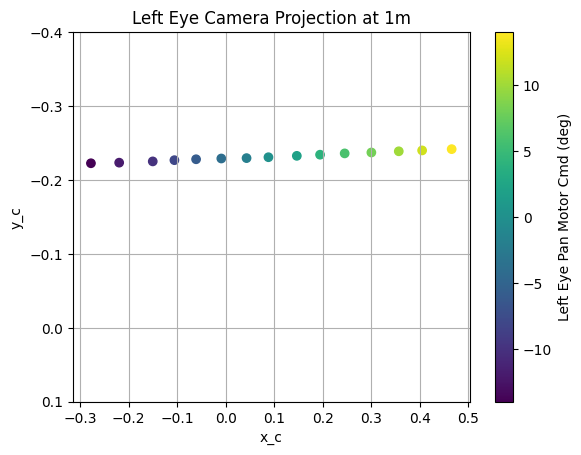

In [10]:
# Left Eye Cam
plt.figure()
data_for_colors = df['cmd_theta_left_eye_pan'].unique()
plt.scatter(zero_df_1m['x_c_l'],zero_df_1m['y_c_l'], c=data_for_colors, cmap='viridis')
plt.colorbar(label='Left Eye Pan Motor Cmd (deg)')
plt.ylim([0.1,-0.4])
plt.xlabel('x_c')
plt.ylabel('y_c')
plt.title('Left Eye Camera Projection at 1m')
plt.grid()

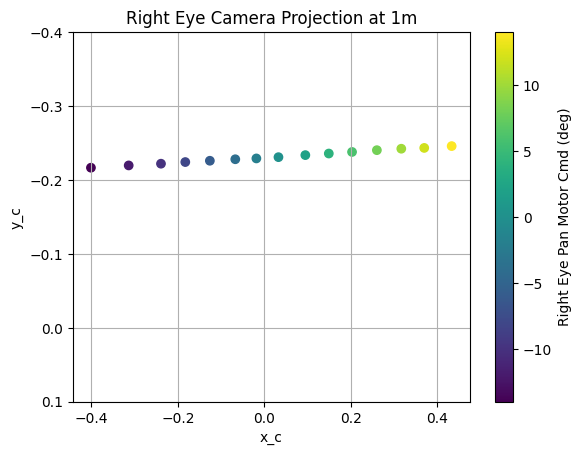

In [11]:
# Right Eye Cam
plt.figure()
data_for_colors = df['cmd_theta_right_eye_pan'].unique()
plt.scatter(zero_df_1m['x_c_r'],zero_df_1m['y_c_r'], c=data_for_colors, cmap='viridis')
plt.colorbar(label='Right Eye Pan Motor Cmd (deg)')
plt.ylim([0.1,-0.4])
plt.xlabel('x_c')
plt.ylabel('y_c')
plt.title('Right Eye Camera Projection at 1m')
plt.grid()

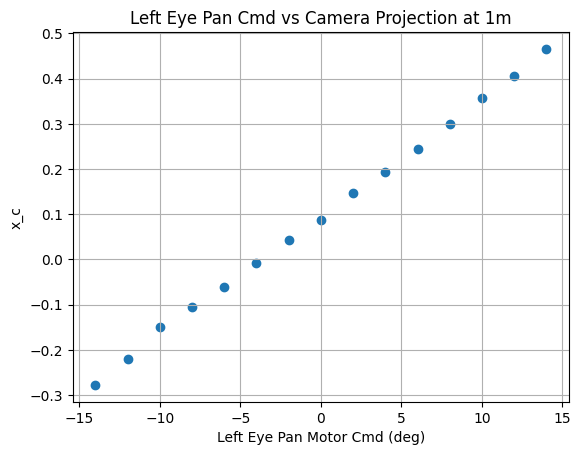

In [12]:
# Left Eye Pan Cmd vs Projection
plt.figure()
plt.scatter(zero_df_1m['cmd_theta_left_eye_pan'],zero_df_1m['x_c_l'])
plt.xlabel('Left Eye Pan Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Left Eye Pan Cmd vs Camera Projection at 1m')
plt.grid()

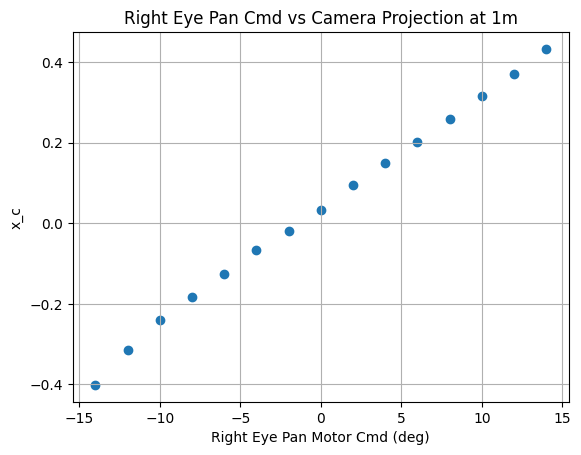

In [13]:
# Right Eye Pan Cmd vs Projection
plt.figure()
plt.scatter(zero_df_1m['cmd_theta_right_eye_pan'],zero_df_1m['x_c_r'])
plt.xlabel('Right Eye Pan Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Right Eye Pan Cmd vs Camera Projection at 1m')
plt.grid()

## 1.25 meter

In [14]:
zero_df_125m = zero_df[(zero_df['z_c_l'] >= 1.15) & (zero_df['z_c_l'] <=1.35)]
print(len(zero_df_125m))

15


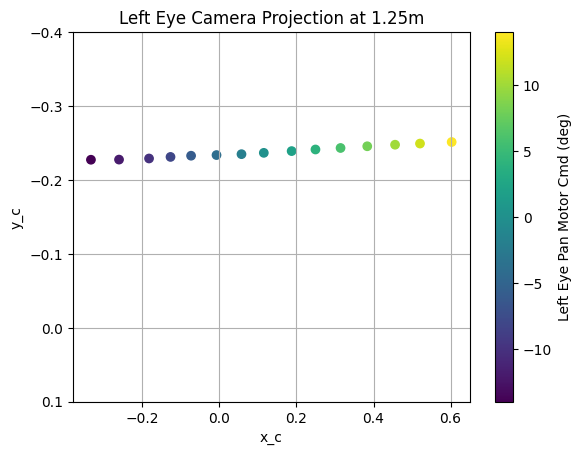

In [15]:
# Left Eye Cam
plt.figure()
data_for_colors = df['cmd_theta_left_eye_pan'].unique()
plt.scatter(zero_df_125m['x_c_l'],zero_df_125m['y_c_l'], c=data_for_colors, cmap='viridis')
plt.colorbar(label='Left Eye Pan Motor Cmd (deg)')
plt.ylim([0.1,-0.4])
plt.xlabel('x_c')
plt.ylabel('y_c')
plt.title('Left Eye Camera Projection at 1.25m')
plt.grid()

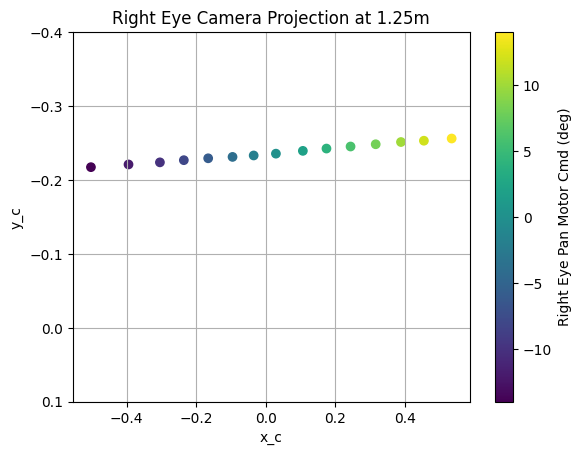

In [16]:
# Right Eye Cam
plt.figure()
data_for_colors = df['cmd_theta_right_eye_pan'].unique()
plt.scatter(zero_df_125m['x_c_r'],zero_df_125m['y_c_r'], c=data_for_colors, cmap='viridis')
plt.colorbar(label='Right Eye Pan Motor Cmd (deg)')
plt.ylim([0.1,-0.4])
plt.xlabel('x_c')
plt.ylabel('y_c')
plt.title('Right Eye Camera Projection at 1.25m')
plt.grid()

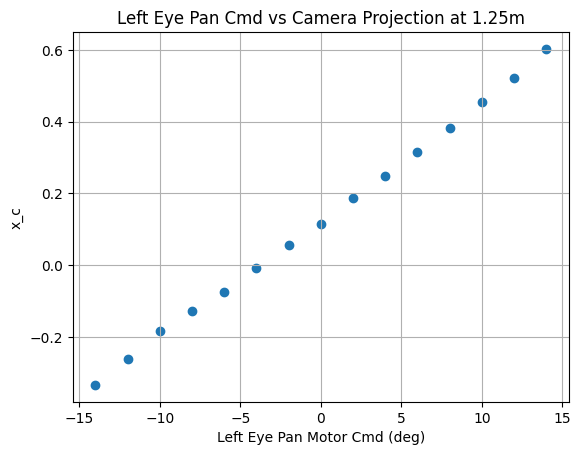

In [17]:
# Left Eye Pan Cmd vs Projection
plt.figure()
plt.scatter(zero_df_125m['cmd_theta_left_eye_pan'],zero_df_125m['x_c_l'])
plt.xlabel('Left Eye Pan Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Left Eye Pan Cmd vs Camera Projection at 1.25m')
plt.grid()

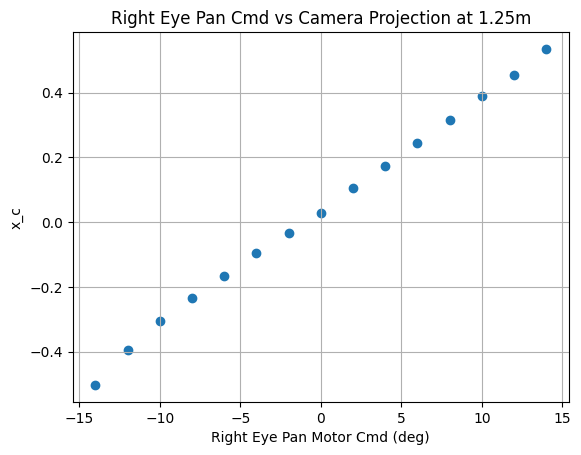

In [18]:
# Right Eye Pan Cmd vs Projection
plt.figure()
plt.scatter(zero_df_125m['cmd_theta_right_eye_pan'],zero_df_125m['x_c_r'])
plt.xlabel('Right Eye Pan Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Right Eye Pan Cmd vs Camera Projection at 1.25m')
plt.grid()

## Diff Depths

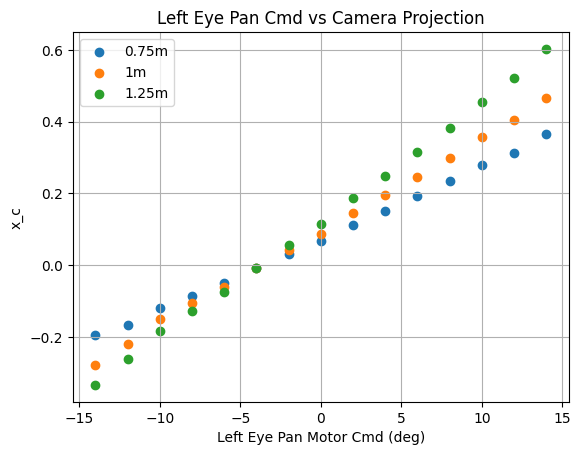

In [19]:
# Left Eye Pan Cmd vs Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_left_eye_pan'],zero_df_075m['x_c_l'])
plt.scatter(zero_df_1m['cmd_theta_left_eye_pan'],zero_df_1m['x_c_l'])
plt.scatter(zero_df_125m['cmd_theta_left_eye_pan'],zero_df_125m['x_c_l'])
plt.xlabel('Left Eye Pan Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Left Eye Pan Cmd vs Camera Projection')
plt.grid()
plt.legend(['0.75m','1m','1.25m'])

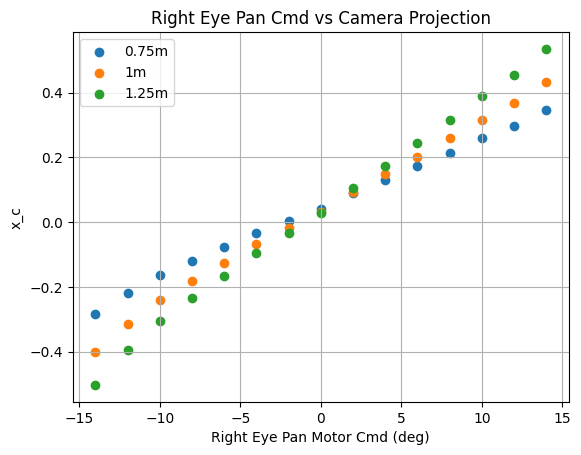

In [20]:
# Right Eye Pan Cmd vs Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_right_eye_pan'],zero_df_075m['x_c_r'])
plt.scatter(zero_df_1m['cmd_theta_right_eye_pan'],zero_df_1m['x_c_r'])
plt.scatter(zero_df_125m['cmd_theta_right_eye_pan'],zero_df_125m['x_c_r'])
plt.xlabel('Right Eye Pan Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Right Eye Pan Cmd vs Camera Projection')
plt.grid()
plt.legend(['0.75m','1m','1.25m'])

# Plot Eye Tilt, Zero Others

In [21]:
zero_df = df[(df['cmd_theta_lower_neck_pan']==0)
             & (df['cmd_theta_lower_neck_tilt']==0)
             & (df['cmd_theta_upper_neck_tilt']==0)
             & (df['cmd_theta_left_eye_pan']==0)
             & (df['cmd_theta_right_eye_pan']==0)]
print(len(zero_df))

33


## 0.75 meter

In [22]:
zero_df_075m = zero_df[(zero_df['z_c_l'] >= 0.65) & (zero_df['z_c_l'] <=0.85)]
print(len(zero_df_075m))

11


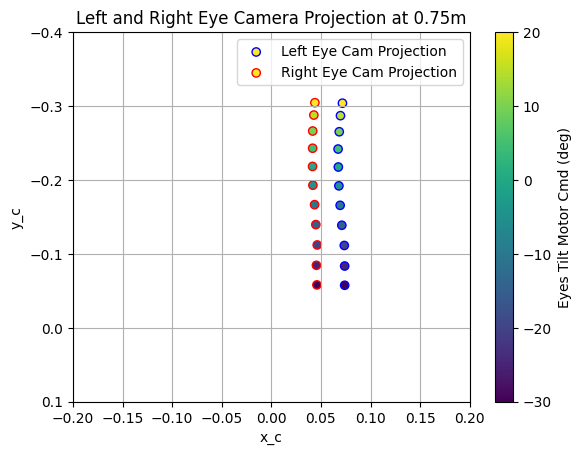

In [23]:
# Left Eye Cam
plt.figure()
data_for_colors = df['cmd_theta_eyes_tilt'].unique()
plt.scatter(zero_df_075m['x_c_l'],zero_df_075m['y_c_l'], c=data_for_colors, cmap='viridis', edgecolor='blue')
plt.scatter(zero_df_075m['x_c_r'],zero_df_075m['y_c_r'], c=data_for_colors, cmap='viridis', edgecolor='red')
plt.colorbar(label='Eyes Tilt Motor Cmd (deg)')
plt.xlim([-0.2,0.2])
plt.ylim([0.1,-0.4])
plt.xlabel('x_c')
plt.ylabel('y_c')
plt.title('Left and Right Eye Camera Projection at 0.75m')
plt.legend(['Left Eye Cam Projection','Right Eye Cam Projection'])
plt.grid()

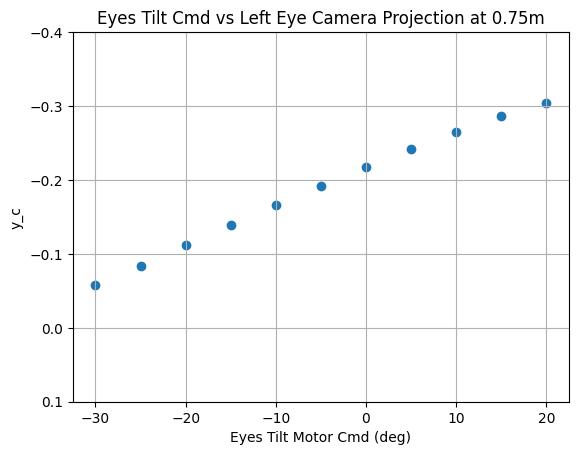

In [24]:
# Left Eye Pan Cmd vs Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_eyes_tilt'],zero_df_075m['y_c_l'])
plt.xlabel('Eyes Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Eyes Tilt Cmd vs Left Eye Camera Projection at 0.75m')
plt.ylim([0.1,-0.4])
plt.grid()

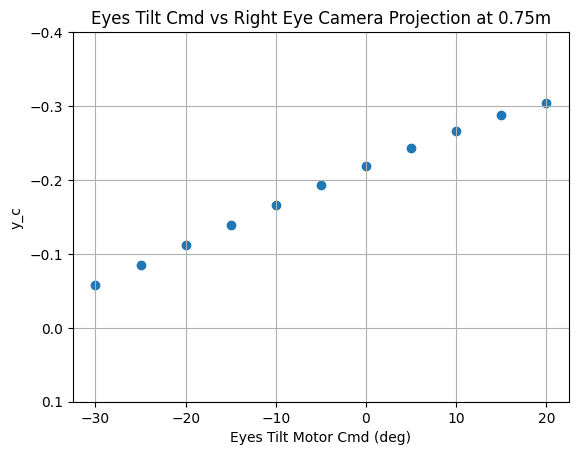

In [25]:
# Eyes Tilt Cmd vs Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_eyes_tilt'],zero_df_075m['y_c_r'])
plt.xlabel('Eyes Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Eyes Tilt Cmd vs Right Eye Camera Projection at 0.75m')
plt.ylim([0.1,-0.4])
plt.grid()

## 1 meter

In [26]:
zero_df_1m = zero_df[(zero_df['z_c_l'] >= 0.9) & (zero_df['z_c_l'] <=1.1)]
print(len(zero_df_1m))

11


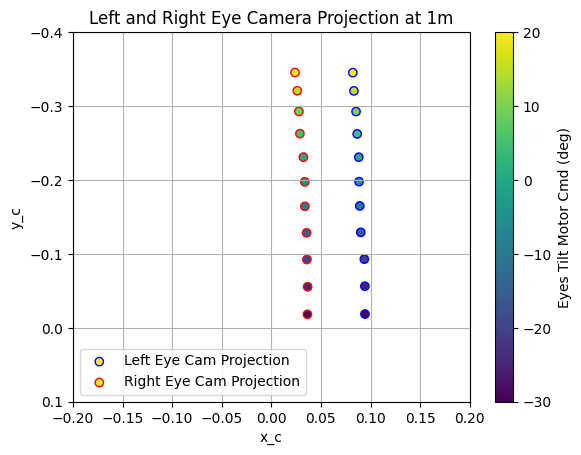

In [27]:
# Left Eye Cam
plt.figure()
data_for_colors = df['cmd_theta_eyes_tilt'].unique()
plt.scatter(zero_df_1m['x_c_l'],zero_df_1m['y_c_l'], c=data_for_colors, cmap='viridis', edgecolor='blue')
plt.scatter(zero_df_1m['x_c_r'],zero_df_1m['y_c_r'], c=data_for_colors, cmap='viridis', edgecolor='red')
plt.colorbar(label='Eyes Tilt Motor Cmd (deg)')
plt.xlim([-0.2,0.2])
plt.ylim([0.1,-0.4])
plt.xlabel('x_c')
plt.ylabel('y_c')
plt.title('Left and Right Eye Camera Projection at 1m')
plt.legend(['Left Eye Cam Projection','Right Eye Cam Projection'])
plt.grid()

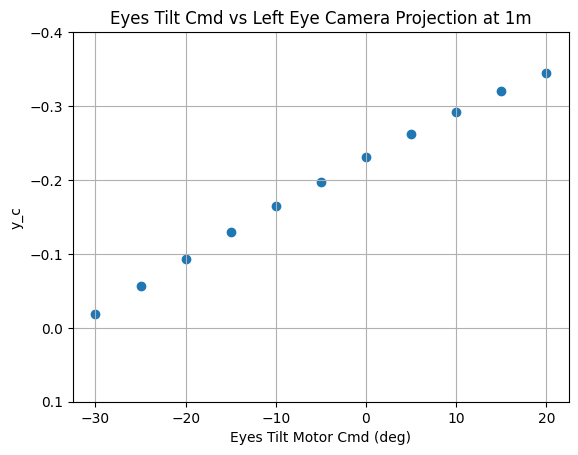

In [28]:
# Eyes Tilt vs Projection
plt.figure()
plt.scatter(zero_df_1m['cmd_theta_eyes_tilt'],zero_df_1m['y_c_l'])
plt.xlabel('Eyes Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Eyes Tilt Cmd vs Left Eye Camera Projection at 1m')
plt.ylim([0.1,-0.4])
plt.grid()

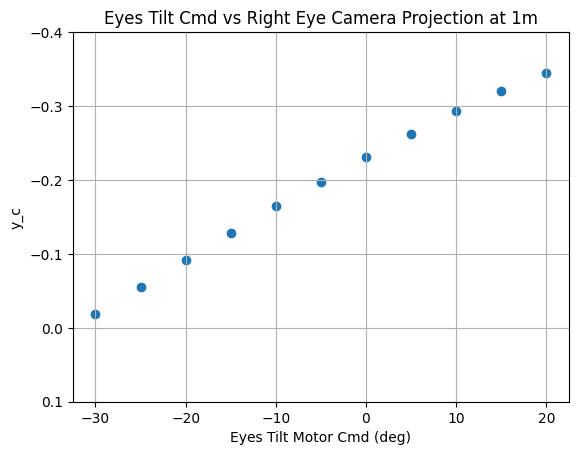

In [29]:
# Eyes Tilt Cmd vs Projection
plt.figure()
plt.scatter(zero_df_1m['cmd_theta_eyes_tilt'],zero_df_1m['y_c_r'])
plt.xlabel('Eyes Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Eyes Tilt Cmd vs Right Eye Camera Projection at 1m')
plt.ylim([0.1,-0.4])
plt.grid()

## 1.25 meter

In [30]:
zero_df_125m = zero_df[(zero_df['z_c_l'] >= 1.15) & (zero_df['z_c_l'] <=1.35)]
print(len(zero_df_125m))

11


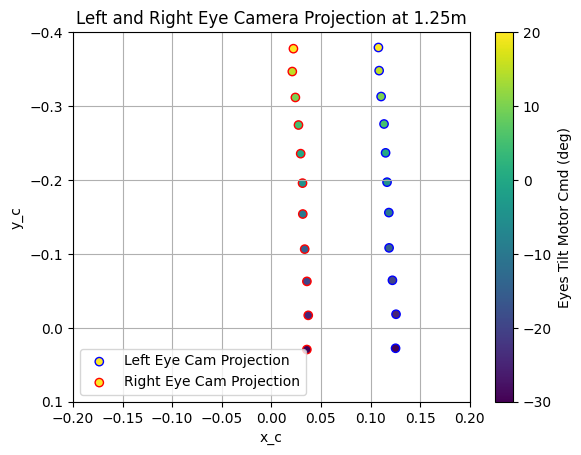

In [31]:
# Left Eye Cam
plt.figure()
data_for_colors = df['cmd_theta_eyes_tilt'].unique()
plt.scatter(zero_df_125m['x_c_l'],zero_df_125m['y_c_l'], c=data_for_colors, cmap='viridis', edgecolor='blue')
plt.scatter(zero_df_125m['x_c_r'],zero_df_125m['y_c_r'], c=data_for_colors, cmap='viridis', edgecolor='red')
plt.colorbar(label='Eyes Tilt Motor Cmd (deg)')
plt.xlim([-0.2,0.2])
plt.ylim([0.1,-0.4])
plt.xlabel('x_c')
plt.ylabel('y_c')
plt.title('Left and Right Eye Camera Projection at 1.25m')
plt.legend(['Left Eye Cam Projection','Right Eye Cam Projection'])
plt.grid()

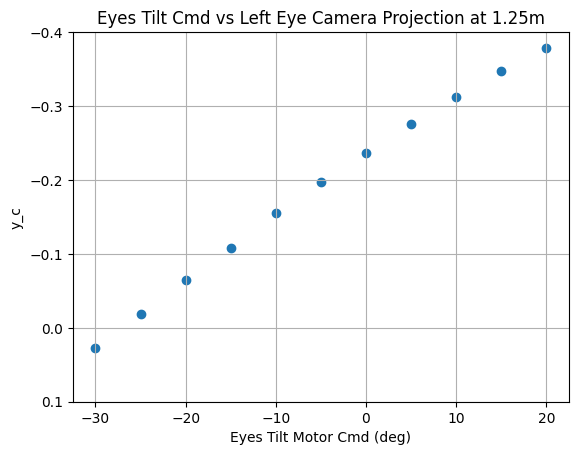

In [32]:
# Eyes Tilt vs Projection
plt.figure()
plt.scatter(zero_df_125m['cmd_theta_eyes_tilt'],zero_df_125m['y_c_l'])
plt.xlabel('Eyes Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Eyes Tilt Cmd vs Left Eye Camera Projection at 1.25m')
plt.ylim([0.1,-0.4])
plt.grid()

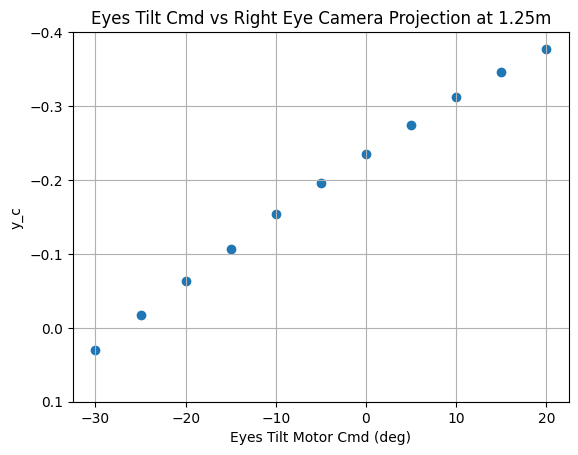

In [33]:
# Eyes Tilt Cmd vs Projection
plt.figure()
plt.scatter(zero_df_125m['cmd_theta_eyes_tilt'],zero_df_125m['y_c_r'])
plt.xlabel('Eyes Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Eyes Tilt Cmd vs Right Eye Camera Projection at 1.25m')
plt.ylim([0.1,-0.4])
plt.grid()

## Diff Depths

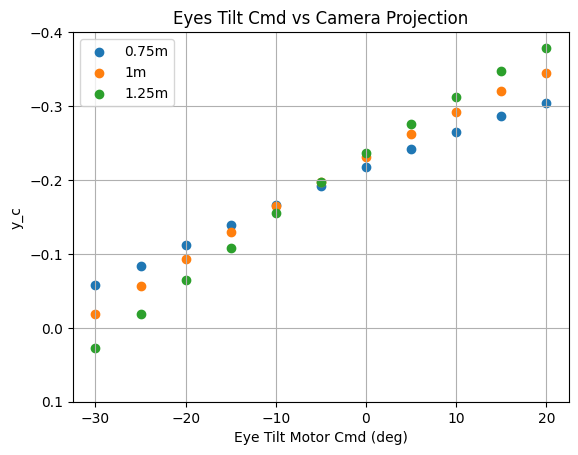

In [34]:
# Eyes Tilt Cmd vs Left Eye Cam Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_eyes_tilt'],zero_df_075m['y_c_l'])
plt.scatter(zero_df_1m['cmd_theta_eyes_tilt'],zero_df_1m['y_c_l'])
plt.scatter(zero_df_125m['cmd_theta_eyes_tilt'],zero_df_125m['y_c_l'])
plt.xlabel('Eye Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Eyes Tilt Cmd vs Camera Projection')
plt.grid()
plt.ylim([0.1,-0.4])
plt.legend(['0.75m','1m','1.25m'])

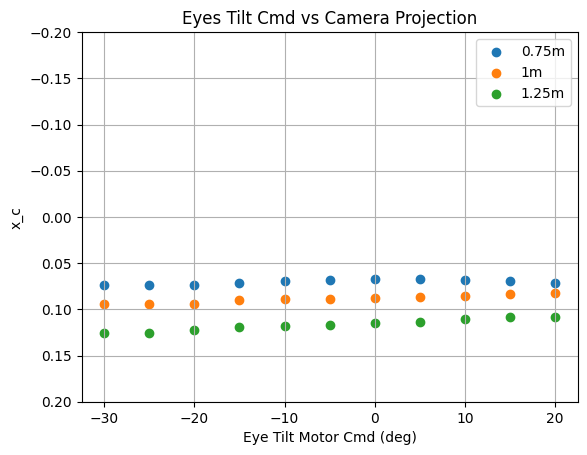

In [35]:
# Eyes Tilt Cmd vs LLeft Eye Cam Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_eyes_tilt'],zero_df_075m['x_c_l'])
plt.scatter(zero_df_1m['cmd_theta_eyes_tilt'],zero_df_1m['x_c_l'])
plt.scatter(zero_df_125m['cmd_theta_eyes_tilt'],zero_df_125m['x_c_l'])
plt.xlabel('Eye Tilt Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Eyes Tilt Cmd vs Camera Projection')
plt.grid()
plt.ylim([0.2,-0.2])
plt.legend(['0.75m','1m','1.25m'])

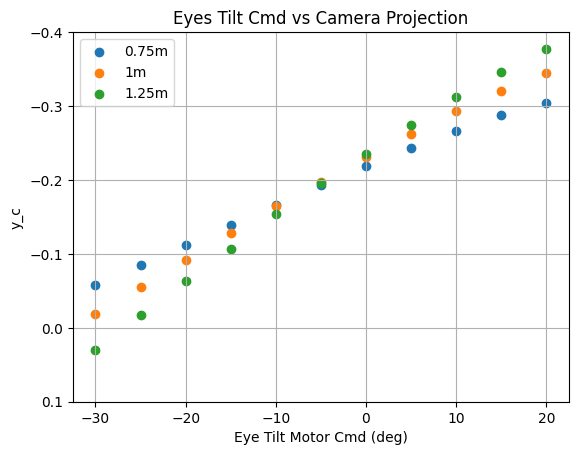

In [36]:
# Eyes Tilt Cmd vs Right Eye Cam Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_eyes_tilt'],zero_df_075m['y_c_r'])
plt.scatter(zero_df_1m['cmd_theta_eyes_tilt'],zero_df_1m['y_c_r'])
plt.scatter(zero_df_125m['cmd_theta_eyes_tilt'],zero_df_125m['y_c_r'])
plt.xlabel('Eye Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Eyes Tilt Cmd vs Camera Projection')
plt.grid()
plt.ylim([0.1,-0.4])
plt.legend(['0.75m','1m','1.25m'])

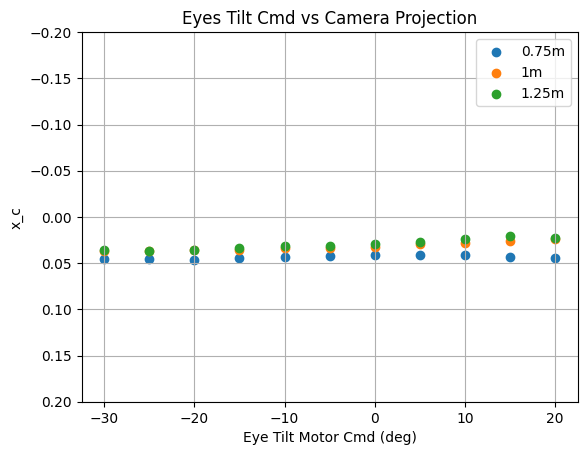

In [37]:
# Eyes Tilt Cmd vs Right Eye Cam Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_eyes_tilt'],zero_df_075m['x_c_r'])
plt.scatter(zero_df_1m['cmd_theta_eyes_tilt'],zero_df_1m['x_c_r'])
plt.scatter(zero_df_125m['cmd_theta_eyes_tilt'],zero_df_125m['x_c_r'])
plt.xlabel('Eye Tilt Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Eyes Tilt Cmd vs Camera Projection')
plt.grid()
plt.ylim([0.2,-0.2])
plt.legend(['0.75m','1m','1.25m'])

# Plot Upper Neck Tilt, Zero Others

In [38]:
zero_df = df[(df['cmd_theta_lower_neck_pan']==0)
             & (df['cmd_theta_lower_neck_tilt']==0)
             & (df['cmd_theta_eyes_tilt']==0)
             & (df['cmd_theta_left_eye_pan']==0)
             & (df['cmd_theta_right_eye_pan']==0)]
print(len(zero_df))

18


## 0.75 meter

In [39]:
zero_df_075m = zero_df[(zero_df['z_c_l'] >= 0.65) & (zero_df['z_c_l'] <=0.85)]
print(len(zero_df_075m))

6


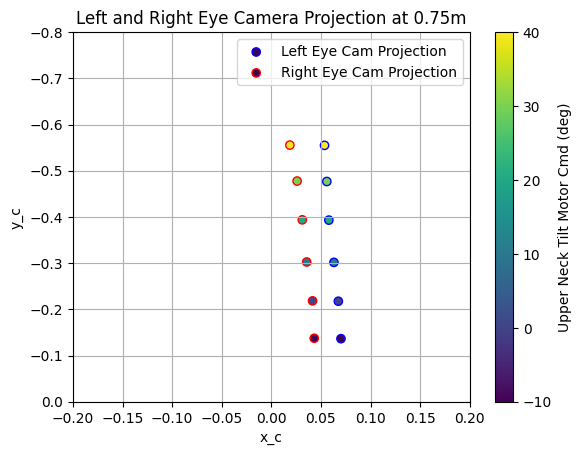

In [40]:
# Left and Right Eye Cam
plt.figure()
data_for_colors = df['cmd_theta_upper_neck_tilt'].unique()
plt.scatter(zero_df_075m['x_c_l'],zero_df_075m['y_c_l'], c=data_for_colors, cmap='viridis', edgecolor='blue')
plt.scatter(zero_df_075m['x_c_r'],zero_df_075m['y_c_r'], c=data_for_colors, cmap='viridis', edgecolor='red')
plt.colorbar(label='Upper Neck Tilt Motor Cmd (deg)')
plt.xlim([-0.2,0.2])
plt.ylim([0.0,-0.8])
plt.xlabel('x_c')
plt.ylabel('y_c')
plt.title('Left and Right Eye Camera Projection at 0.75m')
plt.legend(['Left Eye Cam Projection','Right Eye Cam Projection'])
plt.grid()

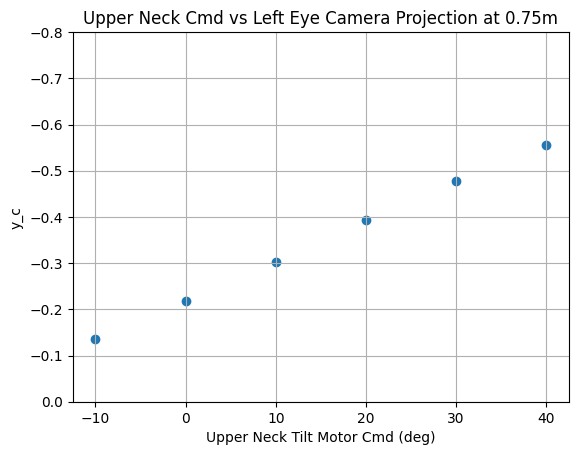

In [41]:
# Left Eye Pan Cmd vs Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_upper_neck_tilt'],zero_df_075m['y_c_l'])
plt.xlabel('Upper Neck Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Upper Neck Cmd vs Left Eye Camera Projection at 0.75m')
plt.ylim([0.0,-0.8])
plt.grid()

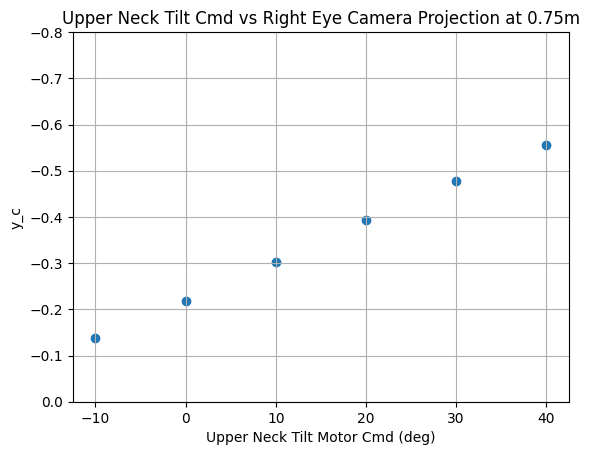

In [42]:
# Eyes Tilt Cmd vs Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_upper_neck_tilt'],zero_df_075m['y_c_r'])
plt.xlabel('Upper Neck Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Upper Neck Tilt Cmd vs Right Eye Camera Projection at 0.75m')
plt.ylim([0.0,-0.8])
plt.grid()

## 1 meter

In [43]:
zero_df_1m = zero_df[(zero_df['z_c_l'] >= 0.9) & (zero_df['z_c_l'] <=1.1)]
print(len(zero_df_1m))

6


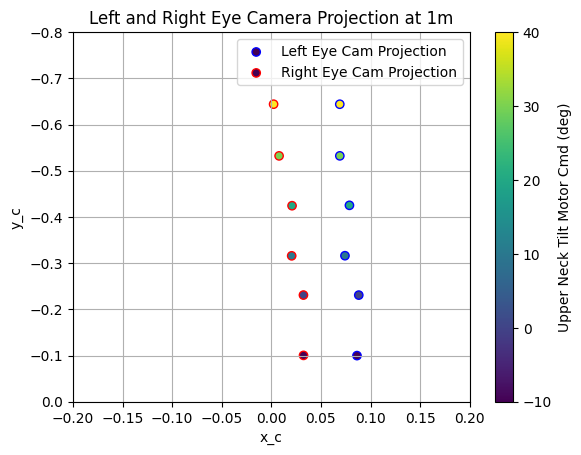

In [44]:
# Left Eye Cam
plt.figure()
data_for_colors = df['cmd_theta_upper_neck_tilt'].unique()
plt.scatter(zero_df_1m['x_c_l'],zero_df_1m['y_c_l'], c=data_for_colors, cmap='viridis', edgecolor='blue')
plt.scatter(zero_df_1m['x_c_r'],zero_df_1m['y_c_r'], c=data_for_colors, cmap='viridis', edgecolor='red')
plt.colorbar(label='Upper Neck Tilt Motor Cmd (deg)')
plt.xlim([-0.2,0.2])
plt.ylim([0.0,-0.8])
plt.xlabel('x_c')
plt.ylabel('y_c')
plt.title('Left and Right Eye Camera Projection at 1m')
plt.legend(['Left Eye Cam Projection','Right Eye Cam Projection'])
plt.grid()

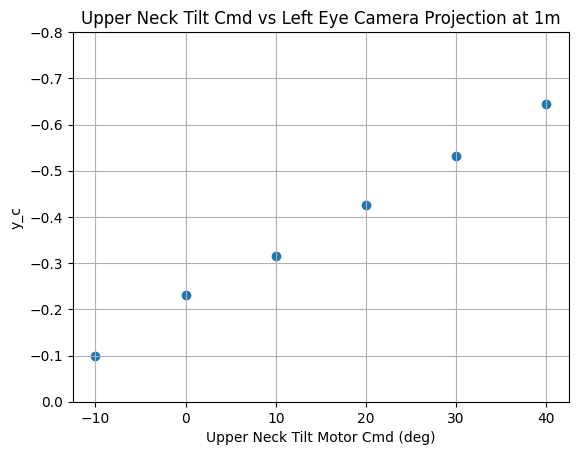

In [45]:
# Upper Neck Tilt vs Projection
plt.figure()
plt.scatter(zero_df_1m['cmd_theta_upper_neck_tilt'],zero_df_1m['y_c_l'])
plt.xlabel('Upper Neck Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Upper Neck Tilt Cmd vs Left Eye Camera Projection at 1m')
plt.ylim([0.0,-0.8])
plt.grid()

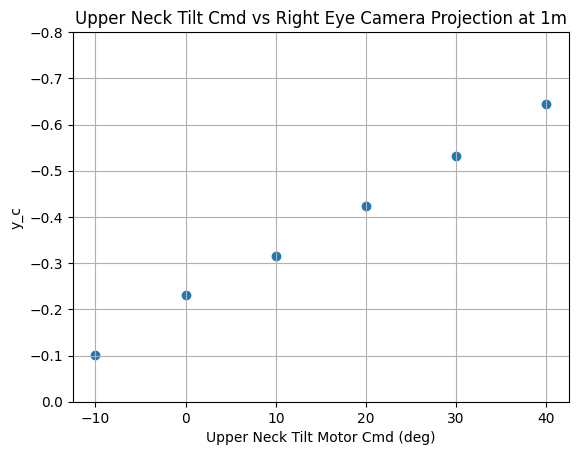

In [46]:
# Upper Neck Tilt Cmd vs Projection
plt.figure()
plt.scatter(zero_df_1m['cmd_theta_upper_neck_tilt'],zero_df_1m['y_c_r'])
plt.xlabel('Upper Neck Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Upper Neck Tilt Cmd vs Right Eye Camera Projection at 1m')
plt.ylim([0.0,-0.8])
plt.grid()

## 1.25 meter

In [47]:
zero_df_125m = zero_df[(zero_df['z_c_l'] >= 1.15) & (zero_df['z_c_l'] <=1.35)]
print(len(zero_df_125m))

6


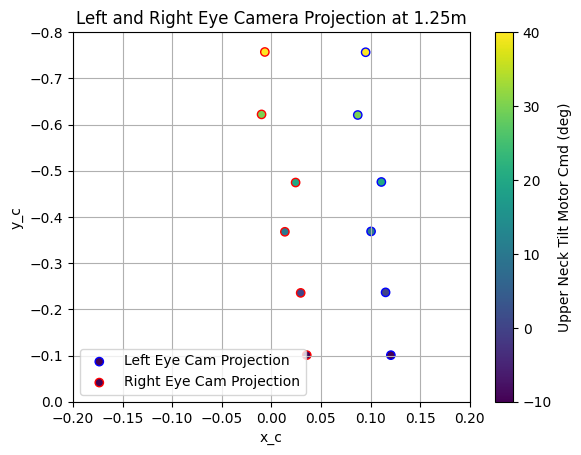

In [48]:
# Left Eye Cam
plt.figure()
data_for_colors = df['cmd_theta_upper_neck_tilt'].unique()
plt.scatter(zero_df_125m['x_c_l'],zero_df_125m['y_c_l'], c=data_for_colors, cmap='viridis', edgecolor='blue')
plt.scatter(zero_df_125m['x_c_r'],zero_df_125m['y_c_r'], c=data_for_colors, cmap='viridis', edgecolor='red')
plt.colorbar(label='Upper Neck Tilt Motor Cmd (deg)')
plt.xlim([-0.2,0.2])
plt.ylim([0.0,-0.8])
plt.xlabel('x_c')
plt.ylabel('y_c')
plt.title('Left and Right Eye Camera Projection at 1.25m')
plt.legend(['Left Eye Cam Projection','Right Eye Cam Projection'])
plt.grid()

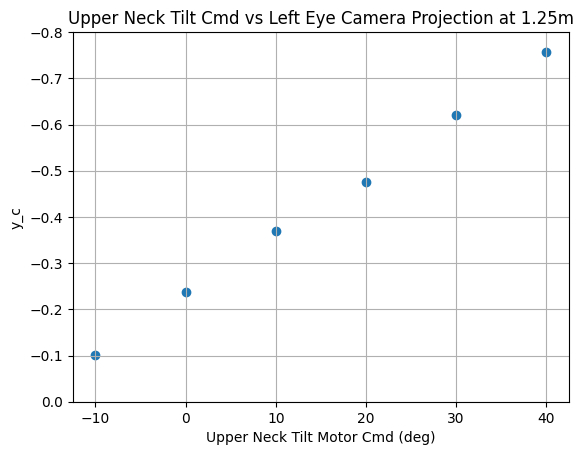

In [49]:
# Upper Neck Tilt vs Projection
plt.figure()
plt.scatter(zero_df_125m['cmd_theta_upper_neck_tilt'],zero_df_125m['y_c_l'])
plt.xlabel('Upper Neck Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Upper Neck Tilt Cmd vs Left Eye Camera Projection at 1.25m')
plt.ylim([0.0,-0.8])
plt.grid()

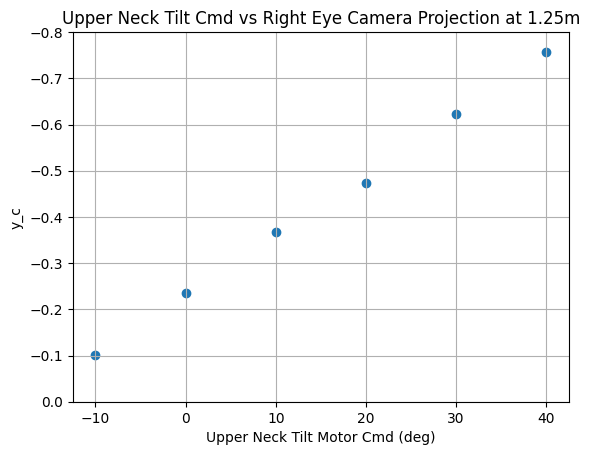

In [50]:
# Upper Neck Tilt Cmd vs Projection
plt.figure()
plt.scatter(zero_df_125m['cmd_theta_upper_neck_tilt'],zero_df_125m['y_c_r'])
plt.xlabel('Upper Neck Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Upper Neck Tilt Cmd vs Right Eye Camera Projection at 1.25m')
plt.ylim([0.0,-0.8])
plt.grid()

## Diff Depths

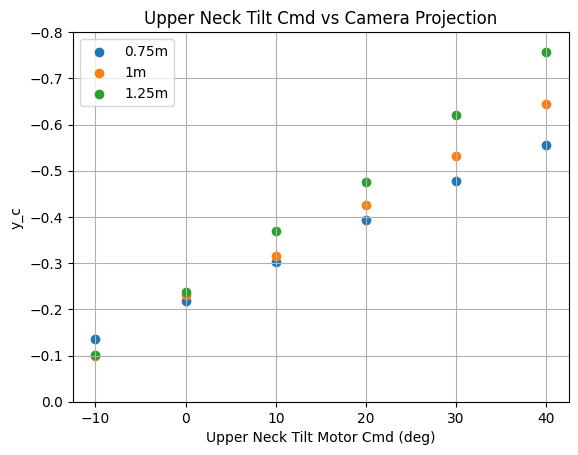

In [51]:
# Upper Neck Tilt Cmd vs Left Eye Cam Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_upper_neck_tilt'],zero_df_075m['y_c_l'])
plt.scatter(zero_df_1m['cmd_theta_upper_neck_tilt'],zero_df_1m['y_c_l'])
plt.scatter(zero_df_125m['cmd_theta_upper_neck_tilt'],zero_df_125m['y_c_l'])
plt.xlabel('Upper Neck Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Upper Neck Tilt Cmd vs Camera Projection')
plt.grid()
plt.ylim([0.0,-0.8])
plt.legend(['0.75m','1m','1.25m'])

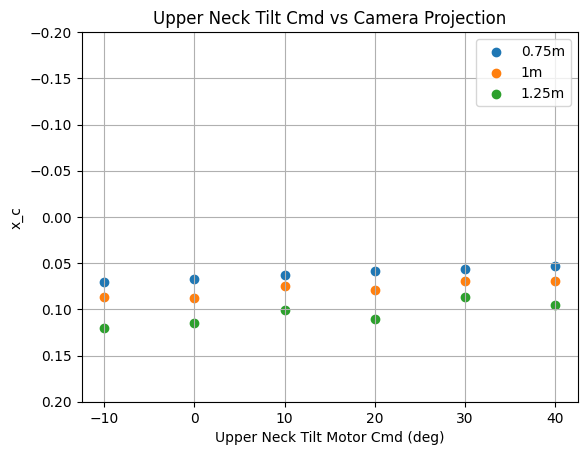

In [52]:
# Upper Neck Tilt Cmd vs LLeft Eye Cam Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_upper_neck_tilt'],zero_df_075m['x_c_l'])
plt.scatter(zero_df_1m['cmd_theta_upper_neck_tilt'],zero_df_1m['x_c_l'])
plt.scatter(zero_df_125m['cmd_theta_upper_neck_tilt'],zero_df_125m['x_c_l'])
plt.xlabel('Upper Neck Tilt Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Upper Neck Tilt Cmd vs Camera Projection')
plt.grid()
plt.ylim([0.2,-0.2])
plt.legend(['0.75m','1m','1.25m'])

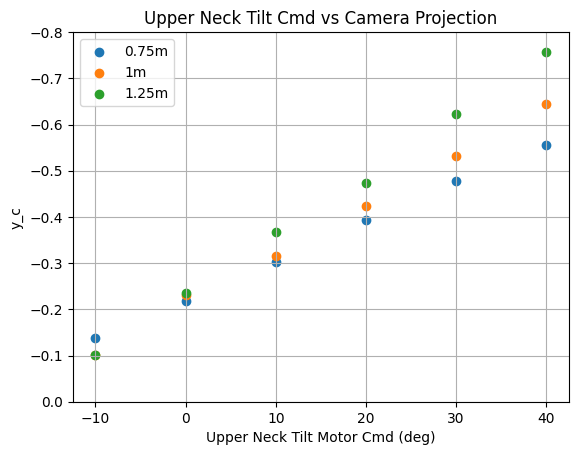

In [53]:
# Upper Neck Tilt Cmd vs Right Eye Cam Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_upper_neck_tilt'],zero_df_075m['y_c_r'])
plt.scatter(zero_df_1m['cmd_theta_upper_neck_tilt'],zero_df_1m['y_c_r'])
plt.scatter(zero_df_125m['cmd_theta_upper_neck_tilt'],zero_df_125m['y_c_r'])
plt.xlabel('Upper Neck Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Upper Neck Tilt Cmd vs Camera Projection')
plt.grid()
plt.ylim([0.0,-0.8])
plt.legend(['0.75m','1m','1.25m'])

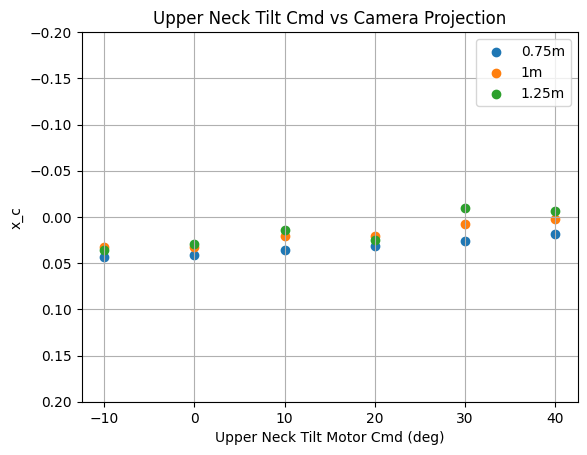

In [54]:
# Upper Neck Tilt Cmd vs Right Eye Cam Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_upper_neck_tilt'],zero_df_075m['x_c_r'])
plt.scatter(zero_df_1m['cmd_theta_upper_neck_tilt'],zero_df_1m['x_c_r'])
plt.scatter(zero_df_125m['cmd_theta_upper_neck_tilt'],zero_df_125m['x_c_r'])
plt.xlabel('Upper Neck Tilt Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Upper Neck Tilt Cmd vs Camera Projection')
plt.grid()
plt.ylim([0.2,-0.2])
plt.legend(['0.75m','1m','1.25m'])

# Plot Lower Neck Tilt, Zero Others

In [55]:
zero_df = df[(df['cmd_theta_lower_neck_pan']==0)
             & (df['cmd_theta_upper_neck_tilt']==0)
             & (df['cmd_theta_eyes_tilt']==0)
             & (df['cmd_theta_left_eye_pan']==0)
             & (df['cmd_theta_right_eye_pan']==0)]
print(len(zero_df))

15


## 0.75 meter

In [56]:
zero_df_075m = zero_df[(zero_df['z_c_l'] >= 0.65) & (zero_df['z_c_l'] <=0.85)]
print(len(zero_df_075m))

5


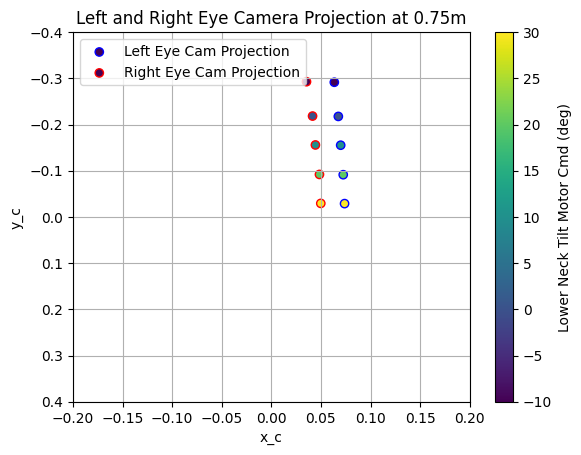

In [57]:
# Left and Right Eye Cam
plt.figure()
data_for_colors = df['cmd_theta_lower_neck_tilt'].unique()
plt.scatter(zero_df_075m['x_c_l'],zero_df_075m['y_c_l'], c=data_for_colors, cmap='viridis', edgecolor='blue')
plt.scatter(zero_df_075m['x_c_r'],zero_df_075m['y_c_r'], c=data_for_colors, cmap='viridis', edgecolor='red')
plt.colorbar(label='Lower Neck Tilt Motor Cmd (deg)')
plt.xlim([-0.2,0.2])
plt.ylim([0.4,-0.4])
plt.xlabel('x_c')
plt.ylabel('y_c')
plt.title('Left and Right Eye Camera Projection at 0.75m')
plt.legend(['Left Eye Cam Projection','Right Eye Cam Projection'])
plt.grid()

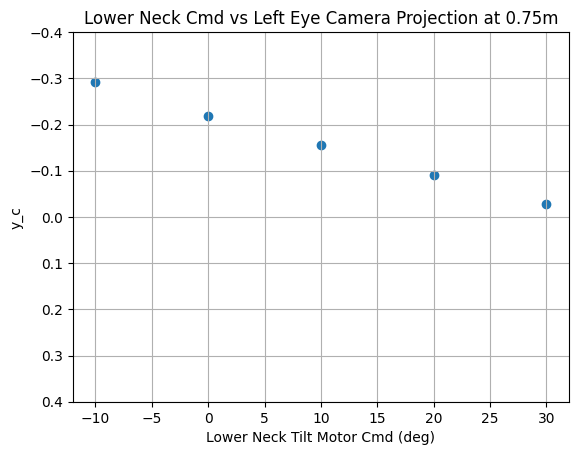

In [58]:
# Left Eye Pan Cmd vs Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_lower_neck_tilt'],zero_df_075m['y_c_l'])
plt.xlabel('Lower Neck Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Lower Neck Cmd vs Left Eye Camera Projection at 0.75m')
plt.ylim([0.4,-0.4])
plt.grid()

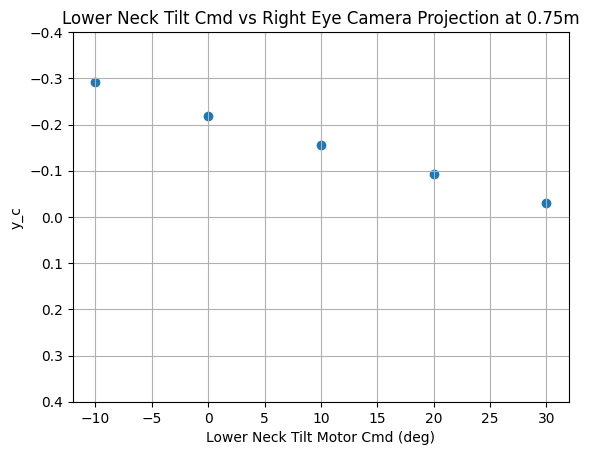

In [59]:
# Eyes Tilt Cmd vs Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_lower_neck_tilt'],zero_df_075m['y_c_r'])
plt.xlabel('Lower Neck Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Lower Neck Tilt Cmd vs Right Eye Camera Projection at 0.75m')
plt.ylim([0.4,-0.4])
plt.grid()

## 1 meter

In [60]:
zero_df_1m = zero_df[(zero_df['z_c_l'] >= 0.9) & (zero_df['z_c_l'] <=1.1)]
print(len(zero_df_1m))

5


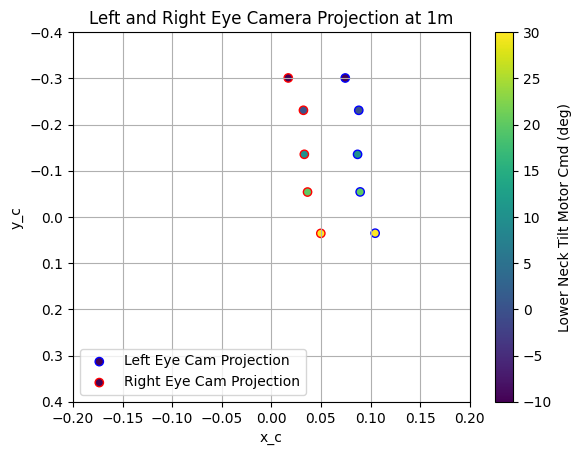

In [61]:
# Left Eye Cam
plt.figure()
data_for_colors = df['cmd_theta_lower_neck_tilt'].unique()
plt.scatter(zero_df_1m['x_c_l'],zero_df_1m['y_c_l'], c=data_for_colors, cmap='viridis', edgecolor='blue')
plt.scatter(zero_df_1m['x_c_r'],zero_df_1m['y_c_r'], c=data_for_colors, cmap='viridis', edgecolor='red')
plt.colorbar(label='Lower Neck Tilt Motor Cmd (deg)')
plt.xlim([-0.2,0.2])
plt.ylim([0.4,-0.4])
plt.xlabel('x_c')
plt.ylabel('y_c')
plt.title('Left and Right Eye Camera Projection at 1m')
plt.legend(['Left Eye Cam Projection','Right Eye Cam Projection'])
plt.grid()

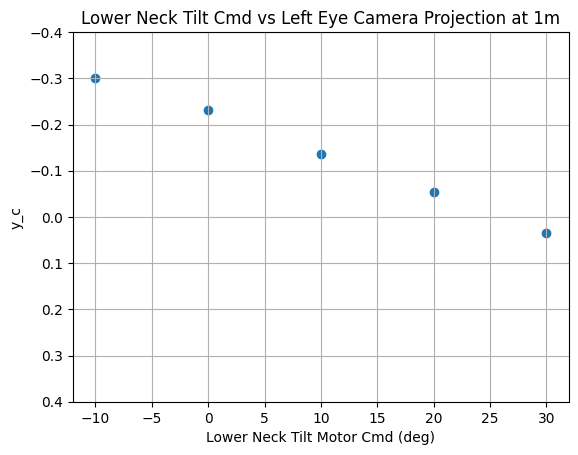

In [62]:
# Lower Neck Tilt vs Projection
plt.figure()
plt.scatter(zero_df_1m['cmd_theta_lower_neck_tilt'],zero_df_1m['y_c_l'])
plt.xlabel('Lower Neck Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Lower Neck Tilt Cmd vs Left Eye Camera Projection at 1m')
plt.ylim([0.4,-0.4])
plt.grid()

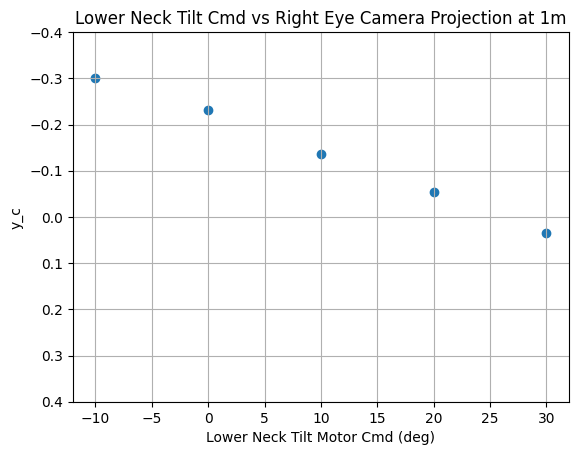

In [63]:
# Lower Neck Tilt Cmd vs Projection
plt.figure()
plt.scatter(zero_df_1m['cmd_theta_lower_neck_tilt'],zero_df_1m['y_c_r'])
plt.xlabel('Lower Neck Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Lower Neck Tilt Cmd vs Right Eye Camera Projection at 1m')
plt.ylim([0.4,-0.4])
plt.grid()

## 1.25 meter

In [64]:
zero_df_125m = zero_df[(zero_df['z_c_l'] >= 1.15) & (zero_df['z_c_l'] <=1.35)]
print(len(zero_df_125m))

5


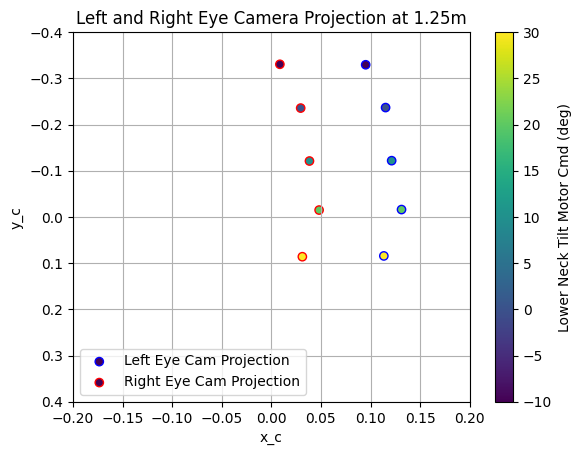

In [65]:
# Left Eye Cam
plt.figure()
data_for_colors = df['cmd_theta_lower_neck_tilt'].unique()
plt.scatter(zero_df_125m['x_c_l'],zero_df_125m['y_c_l'], c=data_for_colors, cmap='viridis', edgecolor='blue')
plt.scatter(zero_df_125m['x_c_r'],zero_df_125m['y_c_r'], c=data_for_colors, cmap='viridis', edgecolor='red')
plt.colorbar(label='Lower Neck Tilt Motor Cmd (deg)')
plt.xlim([-0.2,0.2])
plt.ylim([0.4,-0.4])
plt.xlabel('x_c')
plt.ylabel('y_c')
plt.title('Left and Right Eye Camera Projection at 1.25m')
plt.legend(['Left Eye Cam Projection','Right Eye Cam Projection'])
plt.grid()

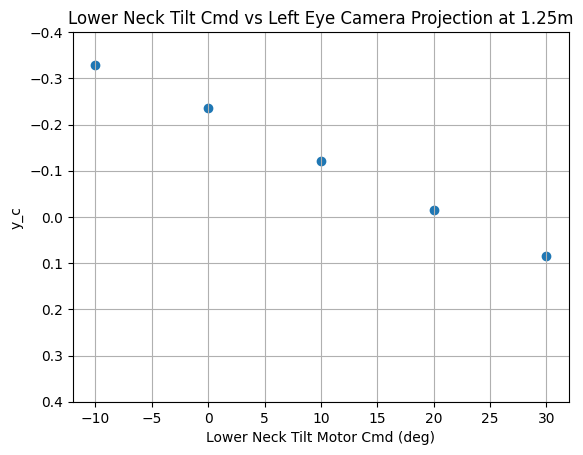

In [66]:
# Lower Neck Tilt vs Projection
plt.figure()
plt.scatter(zero_df_125m['cmd_theta_lower_neck_tilt'],zero_df_125m['y_c_l'])
plt.xlabel('Lower Neck Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Lower Neck Tilt Cmd vs Left Eye Camera Projection at 1.25m')
plt.ylim([0.4,-0.4])
plt.grid()

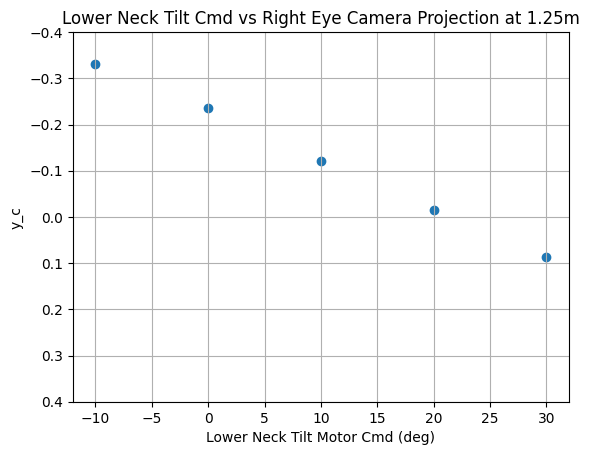

In [67]:
# Lower Neck Tilt Cmd vs Projection
plt.figure()
plt.scatter(zero_df_125m['cmd_theta_lower_neck_tilt'],zero_df_125m['y_c_r'])
plt.xlabel('Lower Neck Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Lower Neck Tilt Cmd vs Right Eye Camera Projection at 1.25m')
plt.ylim([0.4,-0.4])
plt.grid()

## Diff Depths

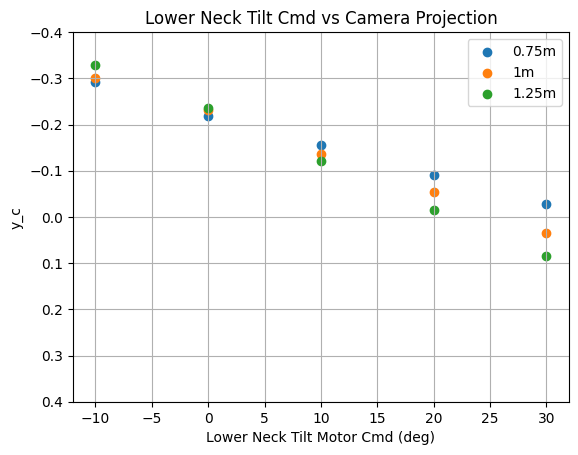

In [68]:
# Lower Neck Tilt Cmd vs Left Eye Cam Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_lower_neck_tilt'],zero_df_075m['y_c_l'])
plt.scatter(zero_df_1m['cmd_theta_lower_neck_tilt'],zero_df_1m['y_c_l'])
plt.scatter(zero_df_125m['cmd_theta_lower_neck_tilt'],zero_df_125m['y_c_l'])
plt.xlabel('Lower Neck Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Lower Neck Tilt Cmd vs Camera Projection')
plt.ylim([0.4,-0.4])
plt.grid()
plt.legend(['0.75m','1m','1.25m'])

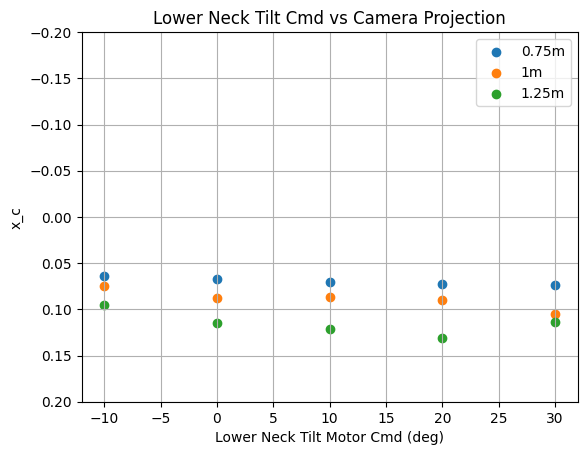

In [69]:
# Lower Neck Tilt Cmd vs LLeft Eye Cam Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_lower_neck_tilt'],zero_df_075m['x_c_l'])
plt.scatter(zero_df_1m['cmd_theta_lower_neck_tilt'],zero_df_1m['x_c_l'])
plt.scatter(zero_df_125m['cmd_theta_lower_neck_tilt'],zero_df_125m['x_c_l'])
plt.xlabel('Lower Neck Tilt Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Lower Neck Tilt Cmd vs Camera Projection')
plt.grid()
plt.ylim([0.2,-0.2])
plt.legend(['0.75m','1m','1.25m'])

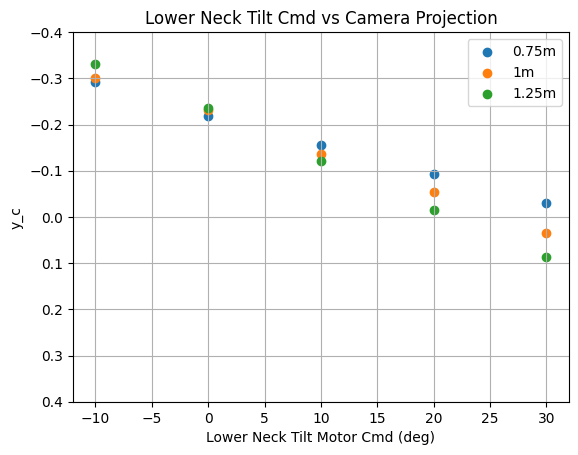

In [70]:
# Lower Neck Tilt Cmd vs Right Eye Cam Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_lower_neck_tilt'],zero_df_075m['y_c_r'])
plt.scatter(zero_df_1m['cmd_theta_lower_neck_tilt'],zero_df_1m['y_c_r'])
plt.scatter(zero_df_125m['cmd_theta_lower_neck_tilt'],zero_df_125m['y_c_r'])
plt.xlabel('Lower Neck Tilt Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Lower Neck Tilt Cmd vs Camera Projection')
plt.grid()
plt.ylim([0.4,-0.4])
plt.legend(['0.75m','1m','1.25m'])

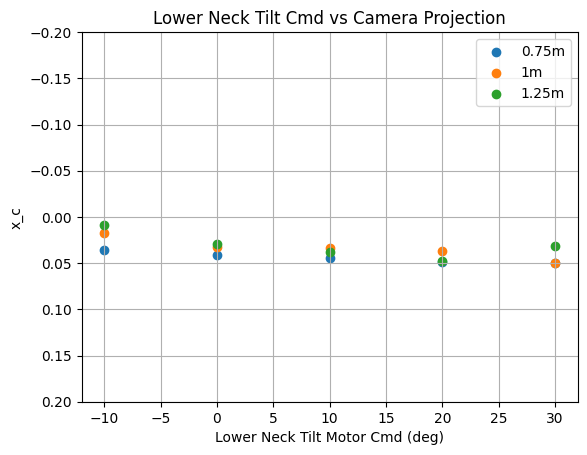

In [71]:
# Lower Neck Tilt Cmd vs Right Eye Cam Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_lower_neck_tilt'],zero_df_075m['x_c_r'])
plt.scatter(zero_df_1m['cmd_theta_lower_neck_tilt'],zero_df_1m['x_c_r'])
plt.scatter(zero_df_125m['cmd_theta_lower_neck_tilt'],zero_df_125m['x_c_r'])
plt.xlabel('Lower Neck Tilt Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Lower Neck Tilt Cmd vs Camera Projection')
plt.grid()
plt.ylim([0.2,-0.2])
plt.legend(['0.75m','1m','1.25m'])

# Plot Lower Neck Pan, Zero Others

In [72]:
zero_df = df[(df['cmd_theta_lower_neck_tilt']==0)
             & (df['cmd_theta_upper_neck_tilt']==0)
             & (df['cmd_theta_eyes_tilt']==0)
             & (df['cmd_theta_left_eye_pan']==0)
             & (df['cmd_theta_right_eye_pan']==0)]
print(len(zero_df))

44


## 0.75 meter

In [73]:
zero_df_075m = zero_df[(zero_df['z_c_l'] >= 0.65) & (zero_df['z_c_l'] <=0.85)]
print(len(zero_df_075m))

15


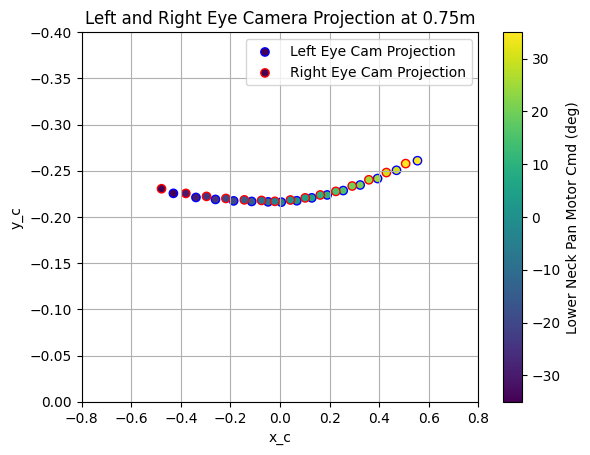

In [74]:
# Left and Right Eye Cam
plt.figure()
data_for_colors = df['cmd_theta_lower_neck_pan'].unique()
plt.scatter(zero_df_075m['x_c_l'],zero_df_075m['y_c_l'], c=data_for_colors, cmap='viridis', edgecolor='blue')
plt.scatter(zero_df_075m['x_c_r'],zero_df_075m['y_c_r'], c=data_for_colors, cmap='viridis', edgecolor='red')
plt.colorbar(label='Lower Neck Pan Motor Cmd (deg)')
plt.xlim([-0.8,0.8])
plt.ylim([0.0,-0.4])
plt.xlabel('x_c')
plt.ylabel('y_c')
plt.title('Left and Right Eye Camera Projection at 0.75m')
plt.legend(['Left Eye Cam Projection','Right Eye Cam Projection'])
plt.grid()

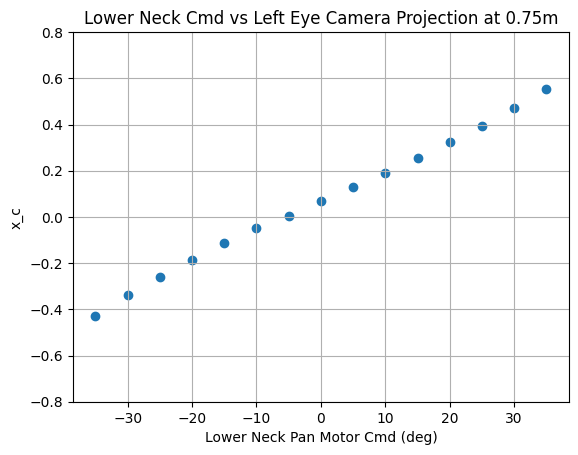

In [75]:
# Left Eye Pan Cmd vs Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_lower_neck_pan'],zero_df_075m['x_c_l'])
plt.xlabel('Lower Neck Pan Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Lower Neck Cmd vs Left Eye Camera Projection at 0.75m')
plt.ylim([-0.8,0.8])
plt.grid()

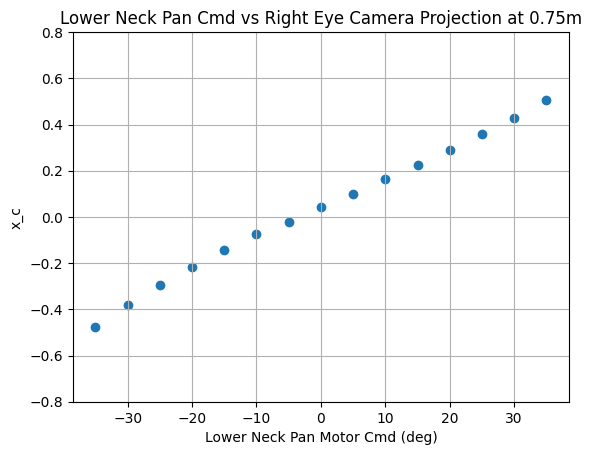

In [76]:
# Eyes Pan Cmd vs Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_lower_neck_pan'],zero_df_075m['x_c_r'])
plt.xlabel('Lower Neck Pan Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Lower Neck Pan Cmd vs Right Eye Camera Projection at 0.75m')
plt.ylim([-0.8,0.8])
plt.grid()

## 1 meter

In [77]:
zero_df_1m = zero_df[(zero_df['z_c_l'] >= 0.9) & (zero_df['z_c_l'] <=1.1)]
print(len(zero_df_1m))

14


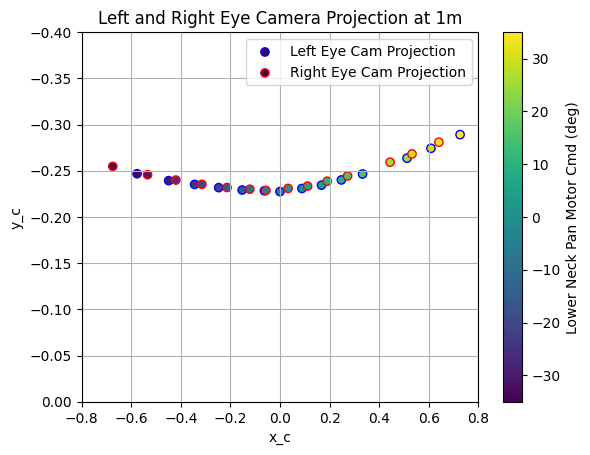

In [78]:
# Left Eye Cam
plt.figure()
data_for_colors = zero_df_1m['cmd_theta_lower_neck_pan'].unique()
plt.scatter(zero_df_1m['x_c_l'],zero_df_1m['y_c_l'], c=data_for_colors, cmap='viridis', edgecolor='blue')
plt.scatter(zero_df_1m['x_c_r'],zero_df_1m['y_c_r'], c=data_for_colors, cmap='viridis', edgecolor='red')
plt.colorbar(label='Lower Neck Pan Motor Cmd (deg)')
plt.xlim([-0.8,0.8])
plt.ylim([0.0,-0.4])
plt.xlabel('x_c')
plt.ylabel('y_c')
plt.title('Left and Right Eye Camera Projection at 1m')
plt.legend(['Left Eye Cam Projection','Right Eye Cam Projection'])
plt.grid()

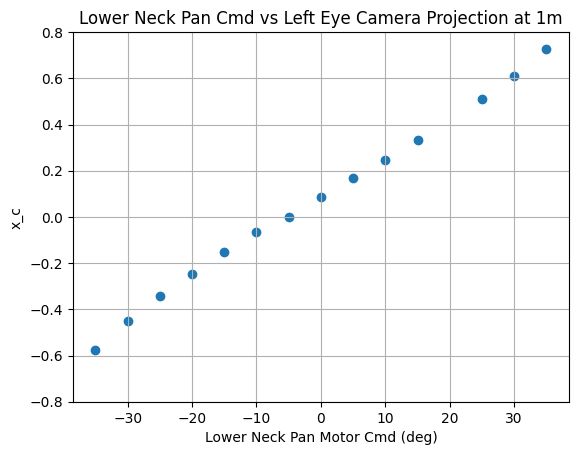

In [79]:
# Lower Neck Pan vs Projection
plt.figure()
plt.scatter(zero_df_1m['cmd_theta_lower_neck_pan'],zero_df_1m['x_c_l'])
plt.xlabel('Lower Neck Pan Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Lower Neck Pan Cmd vs Left Eye Camera Projection at 1m')
plt.ylim([-0.8,0.8])
plt.grid()

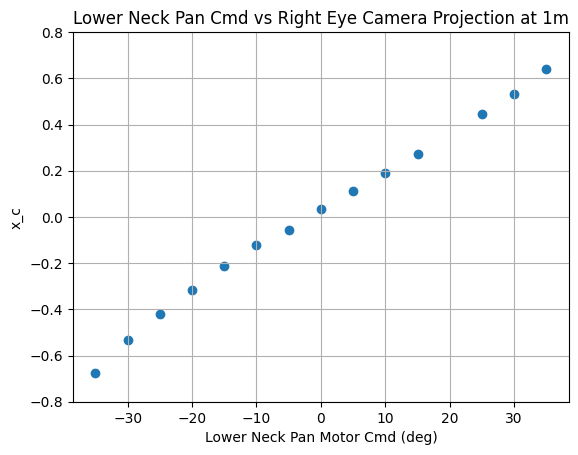

In [80]:
# Lower Neck Pan Cmd vs Projection
plt.figure()
plt.scatter(zero_df_1m['cmd_theta_lower_neck_pan'],zero_df_1m['x_c_r'])
plt.xlabel('Lower Neck Pan Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Lower Neck Pan Cmd vs Right Eye Camera Projection at 1m')
plt.ylim([-0.8,0.8])
plt.grid()

## 1.25 meter

In [81]:
zero_df_125m = zero_df[(zero_df['z_c_l'] >= 1.15) & (zero_df['z_c_l'] <=1.35)]
print(len(zero_df_125m))

15


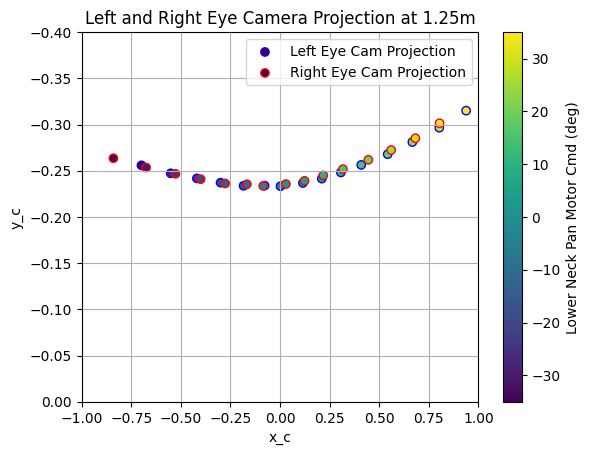

In [82]:
# Left Eye Cam
plt.figure()
data_for_colors = df['cmd_theta_lower_neck_pan'].unique()
plt.scatter(zero_df_125m['x_c_l'],zero_df_125m['y_c_l'], c=data_for_colors, cmap='viridis', edgecolor='blue')
plt.scatter(zero_df_125m['x_c_r'],zero_df_125m['y_c_r'], c=data_for_colors, cmap='viridis', edgecolor='red')
plt.colorbar(label='Lower Neck Pan Motor Cmd (deg)')
plt.xlim([-1.0,1.0])
plt.ylim([0.0,-0.4])
plt.xlabel('x_c')
plt.ylabel('y_c')
plt.title('Left and Right Eye Camera Projection at 1.25m')
plt.legend(['Left Eye Cam Projection','Right Eye Cam Projection'])
plt.grid()

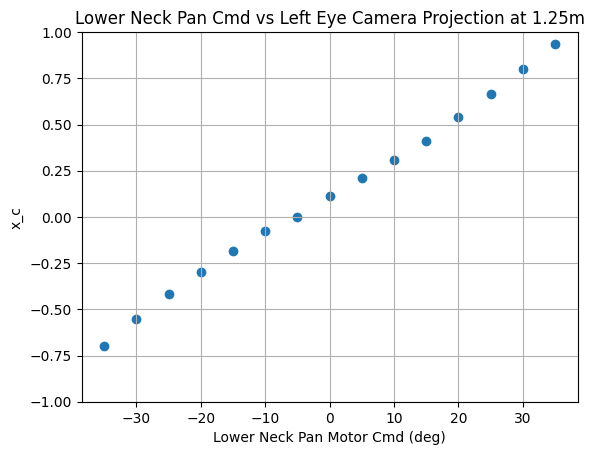

In [83]:
# Lower Neck Pan vs Projection
plt.figure()
plt.scatter(zero_df_125m['cmd_theta_lower_neck_pan'],zero_df_125m['x_c_l'])
plt.xlabel('Lower Neck Pan Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Lower Neck Pan Cmd vs Left Eye Camera Projection at 1.25m')
plt.ylim([-1.0,1.0])
plt.grid()

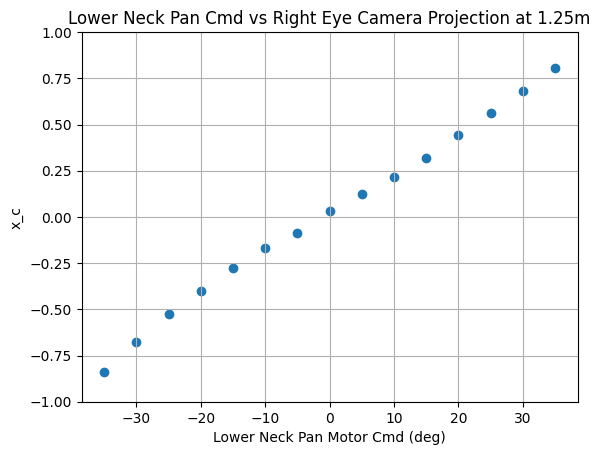

In [84]:
# Lower Neck Pan Cmd vs Projection
plt.figure()
plt.scatter(zero_df_125m['cmd_theta_lower_neck_pan'],zero_df_125m['x_c_r'])
plt.xlabel('Lower Neck Pan Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Lower Neck Pan Cmd vs Right Eye Camera Projection at 1.25m')
plt.ylim([-1.0,1.0])
plt.grid()

## Diff Depths

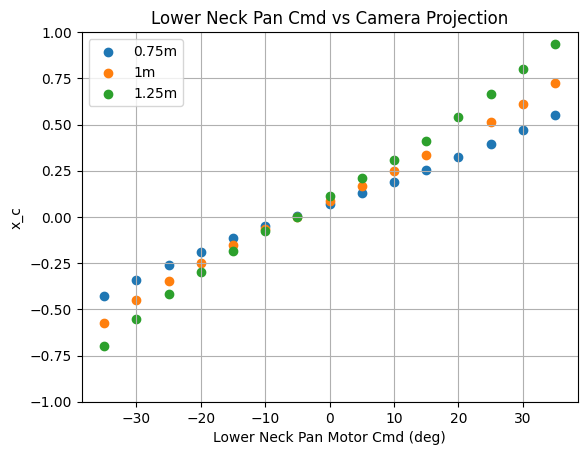

In [85]:
# Lower Neck Pan Cmd vs Left Eye Cam Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_lower_neck_pan'],zero_df_075m['x_c_l'])
plt.scatter(zero_df_1m['cmd_theta_lower_neck_pan'],zero_df_1m['x_c_l'])
plt.scatter(zero_df_125m['cmd_theta_lower_neck_pan'],zero_df_125m['x_c_l'])
plt.xlabel('Lower Neck Pan Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Lower Neck Pan Cmd vs Camera Projection')
plt.ylim([-1.0,1.0])
plt.grid()
plt.legend(['0.75m','1m','1.25m'])

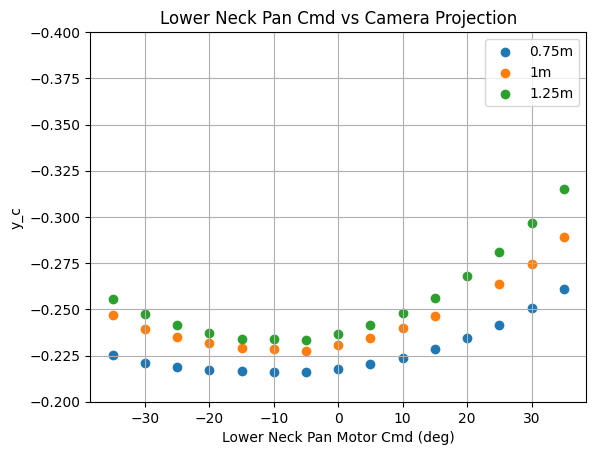

In [86]:
# Lower Neck Pan Cmd vs LLeft Eye Cam Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_lower_neck_pan'],zero_df_075m['y_c_l'])
plt.scatter(zero_df_1m['cmd_theta_lower_neck_pan'],zero_df_1m['y_c_l'])
plt.scatter(zero_df_125m['cmd_theta_lower_neck_pan'],zero_df_125m['y_c_l'])
plt.xlabel('Lower Neck Pan Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Lower Neck Pan Cmd vs Camera Projection')
plt.grid()
plt.ylim([-0.2,-0.4])
plt.legend(['0.75m','1m','1.25m'])

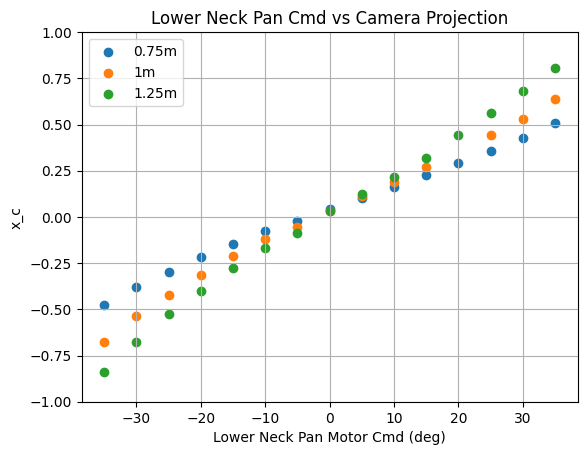

In [87]:
# Lower Neck Pan Cmd vs Right Eye Cam Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_lower_neck_pan'],zero_df_075m['x_c_r'])
plt.scatter(zero_df_1m['cmd_theta_lower_neck_pan'],zero_df_1m['x_c_r'])
plt.scatter(zero_df_125m['cmd_theta_lower_neck_pan'],zero_df_125m['x_c_r'])
plt.xlabel('Lower Neck Pan Motor Cmd (deg)')
plt.ylabel('x_c')
plt.title('Lower Neck Pan Cmd vs Camera Projection')
plt.grid()
plt.ylim([-1.0,1.0])
plt.legend(['0.75m','1m','1.25m'])

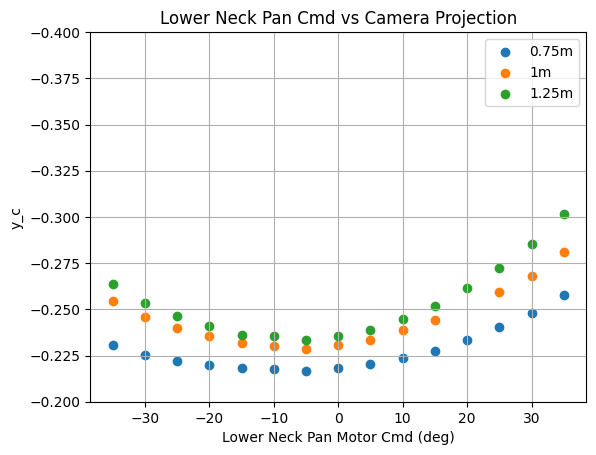

In [88]:
# Lower Neck Pan Cmd vs Right Eye Cam Projection
plt.figure()
plt.scatter(zero_df_075m['cmd_theta_lower_neck_pan'],zero_df_075m['y_c_r'])
plt.scatter(zero_df_1m['cmd_theta_lower_neck_pan'],zero_df_1m['y_c_r'])
plt.scatter(zero_df_125m['cmd_theta_lower_neck_pan'],zero_df_125m['y_c_r'])
plt.xlabel('Lower Neck Pan Motor Cmd (deg)')
plt.ylabel('y_c')
plt.title('Lower Neck Pan Cmd vs Camera Projection')
plt.grid()
plt.ylim([-0.2,-0.4])
plt.legend(['0.75m','1m','1.25m'])

In [89]:
zero_df_1m

,x_c_l,y_c_l,z_c_l,x_c_r,y_c_r,z_c_r,cmd_theta_lower_neck_pan,cmd_theta_lower_neck_tilt,cmd_theta_upper_neck_tilt,cmd_theta_left_eye_pan,cmd_theta_right_eye_pan,cmd_theta_eyes_tilt,state_theta_lower_neck_pan,state_theta_left_lower_neck_tilt,state_theta_right_lower_neck_tilt,state_theta_left_upper_neck_tilt,state_theta_right_upper_neck_tilt,state_theta_left_eye_pan,state_theta_right_eye_pan,state_theta_eyes_tilt
44267,-0.576441,-0.246755,1.011463,-0.674415,-0.254705,1.017108,-35,0,0,0,0,0,-34.365234,0.791016,-0.703125,-0.087891,0.000000,-0.351562,-0.175781,0.439453
44722,-0.449015,-0.239242,1.003997,-0.534227,-0.245675,1.008894,-30,0,0,0,0,0,-29.179688,0.791016,-0.703125,-0.087891,0.000000,-0.351562,-0.175781,0.439453
45190,-0.344446,-0.235181,0.997923,-0.420071,-0.239893,1.002236,-25,0,0,0,0,0,-24.433594,0.791016,-0.703125,-0.087891,0.000000,-0.351562,-0.175781,0.439453
45653,-0.247363,-0.231691,0.992394,-0.315133,-0.235298,0.996250,-20,0,0,0,0,0,-19.599609,0.791016,-0.703125,-0.087891,0.000000,-0.351562,-0.175781,0.439453
46128,-0.152815,-0.229096,0.987135,-0.213598,-0.231854,0.990605,-15,0,0,0,0,0,-14.677734,0.791016,-0.703125,-0.087891,0.000000,-0.351562,-0.175781,0.439453
46623,-0.063237,-0.228275,0.982060,-0.121809,-0.229990,0.985397,-10,0,0,0,0,0,-9.843750,0.791016,-0.791016,-0.087891,0.000000,-0.351562,-0.175781,0.439453
47117,-0.000294,-0.227426,0.978637,-0.056964,-0.228664,0.981855,-5,0,0,0,0,0,-5.800781,0.791016,-0.791016,-0.087891,0.000000,-0.351562,-0.175781,0.351562
47612,0.088171,-0.230764,0.973725,0.032390,-0.230847,0.976880,0,0,0,0,0,0,-0.439453,0.791016,-0.791016,0.000000,0.000000,-0.351562,-0.175781,0.351562
48107,0.167163,-0.234356,0.969300,0.111169,-0.233418,0.972454,5,0,0,0,0,0,4.394531,0.791016,-0.791016,0.000000,0.087891,-0.351562,-0.175781,0.351562
48602,0.247235,-0.240039,0.964826,0.190236,-0.238649,0.968027,10,0,0,0,0,0,9.316406,0.791016,-0.791016,0.000000,0.087891,-0.351562,-0.175781,0.351562


# Polyfit Example

In [90]:
zero_df = df[(df['cmd_theta_lower_neck_pan']==0)
             & (df['cmd_theta_lower_neck_tilt']==0)
             & (df['cmd_theta_upper_neck_tilt']==0)
             & (df['cmd_theta_eyes_tilt']==0)]
print(len(zero_df))

45


In [91]:
zero_df_1m = zero_df[(zero_df['z_c_l'] >= 0.9) & (zero_df['z_c_l'] <=1.1)]
print(len(zero_df_1m))

15


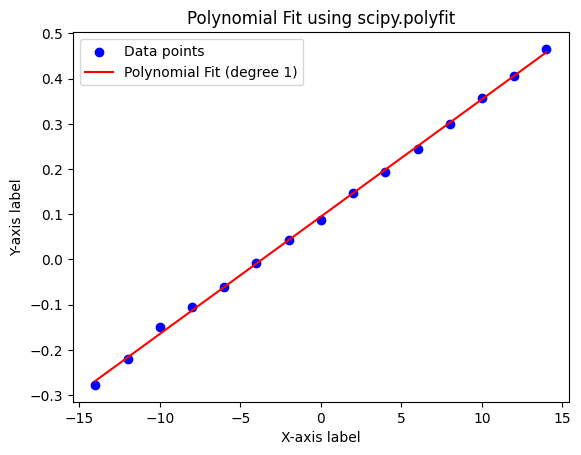

Coefficients: [0.02594607 0.0948399 ]
R²: 0.9993239168116934
RMSE: 0.005831522545359618


In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import polyfit, polyval

# Sample data
np.random.seed(0)
x_plot = np.linspace(-15, 15, 30)  # X values
x = zero_df_1m['cmd_theta_right_eye_pan'].values
y = zero_df_1m['x_c_l'].values

# Fit a polynomial of degree 1 (linear)
degree = 1
coefficients =np.polyfit(x, y, degree)

# Generate fitted values
y_fit = np.polyval(coefficients, x)

# Plot data and the polynomial fit
plt.scatter(x, y, label='Data points', color='blue')
plt.plot(x, y_fit, label=f'Polynomial Fit (degree {degree})', color='red')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Polynomial Fit using scipy.polyfit')
plt.legend()
plt.show()

# Calculate R²
ss_total = np.sum((y - np.mean(y))**2)  # Total sum of squares
ss_residual = np.sum((y - y_fit)**2)    # Residual sum of squares
r_squared = 1 - (ss_residual / ss_total)

# Calculate RMSE
rmse = np.sqrt(np.mean((y - y_fit)**2))

# Print the coefficients
print("Coefficients:", coefficients)
print("R²:", r_squared)
print("RMSE:", rmse)

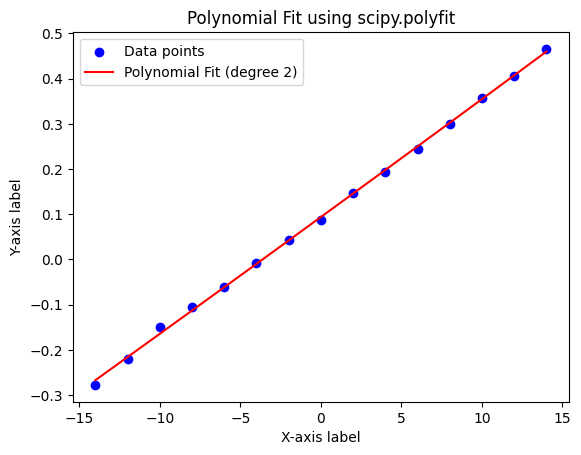

Coefficients: [1.26074166e-05 2.59460738e-02 9.38985509e-02]
R²: 0.9993378219782084
RMSE: 0.005771241815376644


In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import polyfit, polyval

# Sample data
np.random.seed(0)
x_plot = np.linspace(-15, 15, 30)  # X values
x = zero_df_1m['cmd_theta_right_eye_pan'].values
y = zero_df_1m['x_c_l'].values

# Fit a polynomial of degree 1 (linear)
degree = 2
coefficients =np.polyfit(x, y, degree)

# Generate fitted values
y_fit = np.polyval(coefficients, x)

# Plot data and the polynomial fit
plt.scatter(x, y, label='Data points', color='blue')
plt.plot(x, y_fit, label=f'Polynomial Fit (degree {degree})', color='red')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Polynomial Fit using scipy.polyfit')
plt.legend()
plt.show()

# Calculate R²
ss_total = np.sum((y - np.mean(y))**2)  # Total sum of squares
ss_residual = np.sum((y - y_fit)**2)    # Residual sum of squares
r_squared = 1 - (ss_residual / ss_total)

# Calculate RMSE
rmse = np.sqrt(np.mean((y - y_fit)**2))

# Print the coefficients
print("Coefficients:", coefficients)
print("R²:", r_squared)
print("RMSE:", rmse)

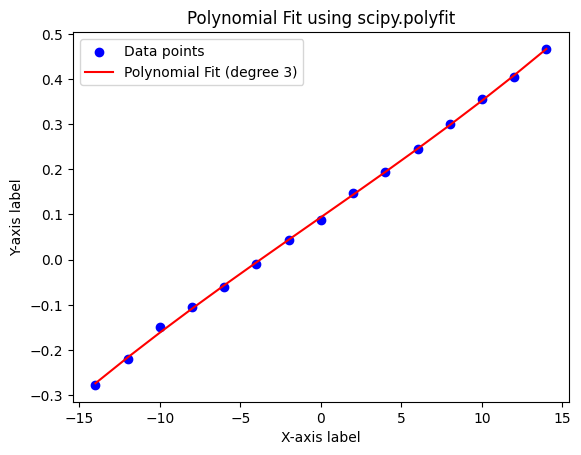

Coefficients: [7.93332028e-06 1.26074166e-05 2.48861822e-02 9.38985509e-02]
R²: 0.9996436393699277
RMSE: 0.004233765013079967


In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import polyfit, polyval

# Sample data
np.random.seed(0)
x_plot = np.linspace(-15, 15, 30)  # X values
x = zero_df_1m['cmd_theta_right_eye_pan'].values
y = zero_df_1m['x_c_l'].values

# Fit a polynomial of degree 1 (linear)
degree = 3
coefficients =np.polyfit(x, y, degree)

# Generate fitted values
y_fit = np.polyval(coefficients, x)

# Plot data and the polynomial fit
plt.scatter(x, y, label='Data points', color='blue')
plt.plot(x, y_fit, label=f'Polynomial Fit (degree {degree})', color='red')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Polynomial Fit using scipy.polyfit')
plt.legend()
plt.show()

# Calculate R²
ss_total = np.sum((y - np.mean(y))**2)  # Total sum of squares
ss_residual = np.sum((y - y_fit)**2)    # Residual sum of squares
r_squared = 1 - (ss_residual / ss_total)

# Calculate RMSE
rmse = np.sqrt(np.mean((y - y_fit)**2))

# Print the coefficients
print("Coefficients:", coefficients)
print("R²:", r_squared)
print("RMSE:", rmse)

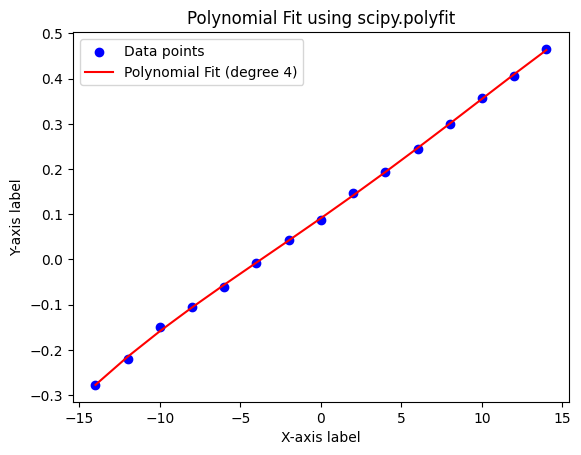

Coefficients: [-6.36265169e-07  7.93332028e-06  1.32952429e-04  2.48861822e-02
  9.12598320e-02]
R²: 0.9997480522853697
RMSE: 0.003559894292859759


In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import polyfit, polyval

# Sample data
np.random.seed(0)
x_plot = np.linspace(-15, 15, 30)  # X values
x = zero_df_1m['cmd_theta_right_eye_pan'].values
y = zero_df_1m['x_c_l'].values

# Fit a polynomial of degree 1 (linear)
degree = 4
coefficients =np.polyfit(x, y, degree)

# Generate fitted values
y_fit = np.polyval(coefficients, x)

# Plot data and the polynomial fit
plt.scatter(x, y, label='Data points', color='blue')
plt.plot(x, y_fit, label=f'Polynomial Fit (degree {degree})', color='red')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Polynomial Fit using scipy.polyfit')
plt.legend()
plt.show()

# Calculate R²
ss_total = np.sum((y - np.mean(y))**2)  # Total sum of squares
ss_residual = np.sum((y - y_fit)**2)    # Residual sum of squares
r_squared = 1 - (ss_residual / ss_total)

# Calculate RMSE
rmse = np.sqrt(np.mean((y - y_fit)**2))

# Print the coefficients
print("Coefficients:", coefficients)
print("R²:", r_squared)
print("RMSE:", rmse)